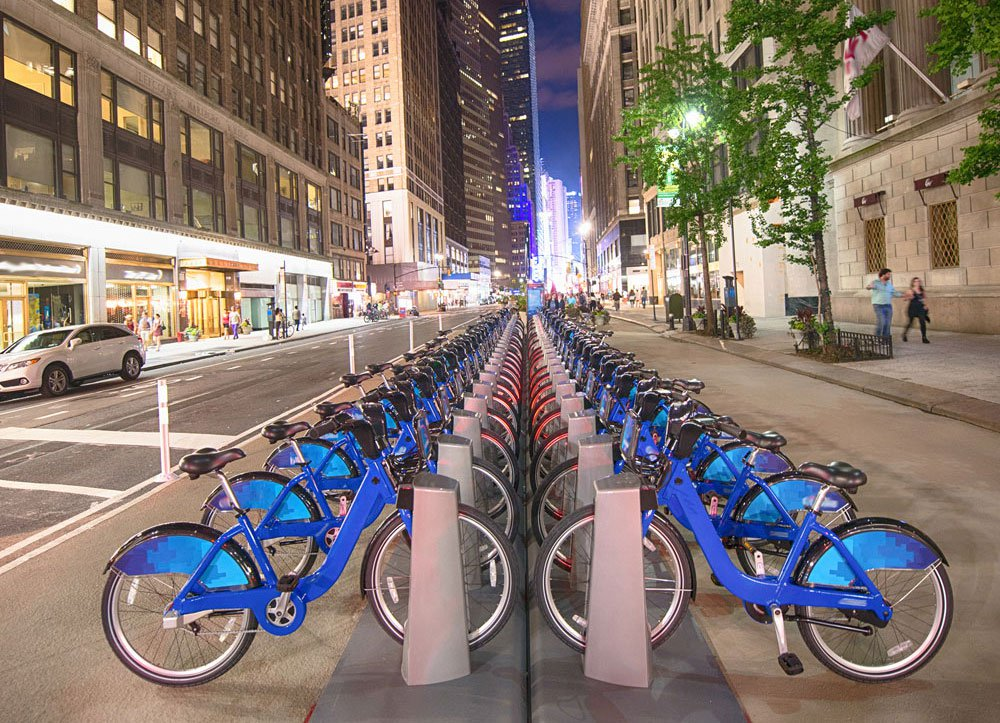

# WELCOME!

Welcome to ***"Bike Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



"Talep Tahmini Projesi"'ne hoş geldiniz. Bu üçüncü bitirme projesidir. Bildiğiniz gibi, son zamanlarda kısa mesafeli seyahatler için motorlu toplu taşıma veya özel araçlara alternatif olarak kentsel bir alanda bisikletlere ücretsiz veya uygun fiyatlı erişim sağlanmaktadır. Böylece, trafik sıkışıklığını, gürültüyü ve hava kirliliğini azaltmayı amaçlamaktadır.

Bu projede, Londra bisiklet paylaşımının tarihçesine dayanarak gelecekteki bisiklet paylaşımlarının sayısını tahmin etmek amaçlanmaktadır. Bu durum, Çift Yönlü LSTM ile bir zaman serisi problemi olarak ele alınacaktır.

Bu hedefe ulaşmak için, daha önce uyguladığınız makine öğrenimi algoritmalarının aksine LSTM ile tahminlerde bulunacaksınız. Uzun kısa süreli bellek (LSTM), derin öğrenme alanında kullanılan bir yapay tekrarlayan sinir ağı mimarisidir. Standart ileri beslemeli sinir ağlarının aksine, LSTM geri bildirim bağlantılarına sahiptir. Tek veri noktalarını değil, tüm veri serilerini işleyebilir.

# Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


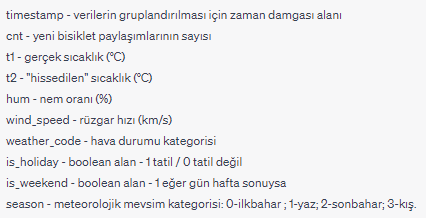

# Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*
    
- Drop unnecessary columns
    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Evaluate on Test Data

- Inverse Transform
- Plot Prediction

#### 5. Retrain and Forecasting

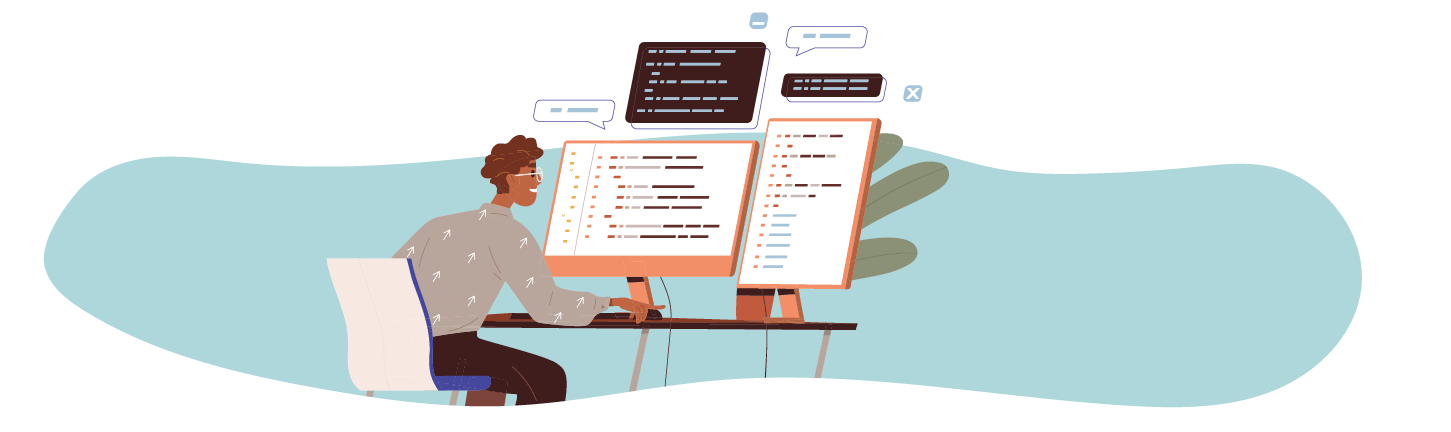

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("store_sharing.csv")

In [3]:
df

timestamp   cnt    t1    t2     hum  wind_speed  \
0      2015-01-04 00:00:00   182 3.000 2.000  93.000       6.000   
1      2015-01-04 01:00:00   138 3.000 2.500  93.000       5.000   
2      2015-01-04 02:00:00   134 2.500 2.500  96.500       0.000   
3      2015-01-04 03:00:00    72 2.000 2.000 100.000       0.000   
4      2015-01-04 04:00:00    47 2.000 0.000  93.000       6.500   
...                    ...   ...   ...   ...     ...         ...   
17409  2017-01-03 19:00:00  1042 5.000 1.000  81.000      19.000   
17410  2017-01-03 20:00:00   541 5.000 1.000  81.000      21.000   
17411  2017-01-03 21:00:00   337 5.500 1.500  78.500      24.000   
17412  2017-01-03 22:00:00   224 5.500 1.500  76.000      23.000   
17413  2017-01-03 23:00:00   139 5.000 1.000  76.000      22.000   

       weather_code  is_holiday  is_weekend  season  
0             3.000       0.000       1.000   3.000  
1             1.000       0.000       1.000   3.000  
2             1.000       0.000       1.000   3.000  
3             1.000       0.000       1.000   3.000  
4             1.000       0.000       1.000   3.000  
...             ...         ...         ...     ...  
17409         3.000       0.000       0.000   3.000  
17410         4.000       0.000       0.000   3.000  
17411         4.000       0.000       0.000   3.000  
17412         4.000       0.000       0.000   3.000  
17413         2.000       0.000       0.000   3.000  

[17414 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df = pd.read_csv("store_sharing.csv", parse_dates=['timestamp'])

Eğer parse_dates=['timestamp'] argümanını kullanmazsak ve sadece df = pd.read_csv("store_sharing.csv") şeklinde bir kod çalıştırırsak, "timestamp" sütunu varsayılan olarak string olarak okunur ve sıradan bir sütun olarak işlenir:

In [6]:
df

timestamp   cnt    t1    t2     hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182 3.000 2.000  93.000       6.000         3.000   
1     2015-01-04 01:00:00   138 3.000 2.500  93.000       5.000         1.000   
2     2015-01-04 02:00:00   134 2.500 2.500  96.500       0.000         1.000   
3     2015-01-04 03:00:00    72 2.000 2.000 100.000       0.000         1.000   
4     2015-01-04 04:00:00    47 2.000 0.000  93.000       6.500         1.000   
...                   ...   ...   ...   ...     ...         ...           ...   
17409 2017-01-03 19:00:00  1042 5.000 1.000  81.000      19.000         3.000   
17410 2017-01-03 20:00:00   541 5.000 1.000  81.000      21.000         4.000   
17411 2017-01-03 21:00:00   337 5.500 1.500  78.500      24.000         4.000   
17412 2017-01-03 22:00:00   224 5.500 1.500  76.000      23.000         4.000   
17413 2017-01-03 23:00:00   139 5.000 1.000  76.000      22.000         2.000   

       is_holiday  is_weekend  season  
0           0.000       1.000   3.000  
1           0.000       1.000   3.000  
2           0.000       1.000   3.000  
3           0.000       1.000   3.000  
4           0.000       1.000   3.000  
...           ...         ...     ...  
17409       0.000       0.000   3.000  
17410       0.000       0.000   3.000  
17411       0.000       0.000   3.000  
17412       0.000       0.000   3.000  
17413       0.000       0.000   3.000  

[17414 rows x 10 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [8]:
df = pd.read_csv("store_sharing.csv", parse_dates=['timestamp'], index_col="timestamp")

Datamızın direk index e gelmesi için ve type ı datetime olması için "parse_dates" ve "index_col" parametrelerini kullandık.
"Parse_dates" ı yapmaz isek "Datetime" Index olmazdı ve bu feature Object olarak tanımlanırdı.

index_col="timestamp" ifadesini kullanarak "timestamp" sütununu veri kümesinin indeksi olarak belirttiğimizde, veri çerçevesindeki her satır benzersiz bir zaman damgasıyla tanımlanır. Bu durumda "timestamp" sütunu, satırları birbirinden ayıran benzersiz bir kimlik görevi görür.

Bunun bazı faydaları şunlardır:

Hızlı erişim: Veri çerçevesindeki belirli bir zaman damgasına ait satırlara hızlı bir şekilde erişebilirsiniz. Zaman damgasına dayalı indeksleme, örneğin belirli bir tarih aralığındaki verileri seçmek veya belirli bir zamanda meydana gelen olayları incelemek gibi işlemleri kolaylaştırır.

Zaman serisi analizi: Zaman serisi verileriyle çalışırken, verileri zamana göre sıralamak ve analiz etmek önemlidir. Zaman damgasını indeks olarak belirleyerek, zaman serisi analizine yönelik çeşitli teknikleri kullanabilirsiniz. Örneğin, trendleri, mevsimsellikleri veya zaman içindeki değişiklikleri analiz edebilirsiniz.

Veri hızlandırma: Veri kümesini bir zaman damgasına göre indekslemek, veriye yapılan sorguları hızlandırabilir. Verinin indekslenmesi, belirli bir zaman damgasıyla ilgili satırların hızlı bir şekilde erişilmesini sağlar. Bu, büyük veri kümesi üzerinde yapılan işlemlerde performansı artırabilir.

Grafik çizimi ve görselleştirme: İndekslendiğinde, zaman damgası verilerini içeren veri çerçevesi, doğrudan grafik çizimi ve görselleştirme araçlarına beslenebilir. Zaman serisi verilerini zamanla değişimi gösteren grafikler veya trend analizi gibi görsel temsillerle daha kolay anlayabilirsiniz.

Özetle, zaman damgasını indeks olarak belirlemek, zaman serisi verileriyle çalışırken veriye daha etkili bir şekilde erişmek, analiz etmek ve görselleştirmek için önemli bir adımdır.

In [9]:
df

cnt    t1    t2     hum  wind_speed  weather_code  \
timestamp                                                                 
2015-01-04 00:00:00   182 3.000 2.000  93.000       6.000         3.000   
2015-01-04 01:00:00   138 3.000 2.500  93.000       5.000         1.000   
2015-01-04 02:00:00   134 2.500 2.500  96.500       0.000         1.000   
2015-01-04 03:00:00    72 2.000 2.000 100.000       0.000         1.000   
2015-01-04 04:00:00    47 2.000 0.000  93.000       6.500         1.000   
...                   ...   ...   ...     ...         ...           ...   
2017-01-03 19:00:00  1042 5.000 1.000  81.000      19.000         3.000   
2017-01-03 20:00:00   541 5.000 1.000  81.000      21.000         4.000   
2017-01-03 21:00:00   337 5.500 1.500  78.500      24.000         4.000   
2017-01-03 22:00:00   224 5.500 1.500  76.000      23.000         4.000   
2017-01-03 23:00:00   139 5.000 1.000  76.000      22.000         2.000   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00       0.000       1.000   3.000  
2015-01-04 01:00:00       0.000       1.000   3.000  
2015-01-04 02:00:00       0.000       1.000   3.000  
2015-01-04 03:00:00       0.000       1.000   3.000  
2015-01-04 04:00:00       0.000       1.000   3.000  
...                         ...         ...     ...  
2017-01-03 19:00:00       0.000       0.000   3.000  
2017-01-03 20:00:00       0.000       0.000   3.000  
2017-01-03 21:00:00       0.000       0.000   3.000  
2017-01-03 22:00:00       0.000       0.000   3.000  
2017-01-03 23:00:00       0.000       0.000   3.000  

[17414 rows x 9 columns]

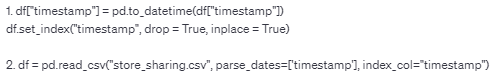

Her ikisi de "store_sharing.csv" dosyasını okuyarak bir veri çerçevesi oluşturur ve "timestamp" sütununu tarih/zaman tipine dönüştürerek indeks olarak ayarlar.

df["timestamp"] = pd.to_datetime(df["timestamp"]): "timestamp" sütununu tarih/zaman tipine dönüştürmek için pd.to_datetime() fonksiyonunu kullanır.

df.set_index("timestamp", drop=True, inplace=True): "timestamp" sütununu veri çerçevesinin indeksi olarak ayarlar.

df = pd.read_csv("store_sharing.csv", parse_dates=['timestamp'], index_col="timestamp"): "store_sharing.csv" dosyasını okurken parse_dates parametresini kullanarak "timestamp" sütununu tarih/zaman tipine dönüştürür ve aynı zamanda bu sütunu veri çerçevesinin indeksi olarak belirler.

Her iki yaklaşım da "timestamp" sütununu indeks olarak kullanılacak şekilde veri çerçevesini düzenler.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


Bütün datalarımızın sayısal bir değer olduğunu ve null verinin olmadığını görüyoruz. 

---
---

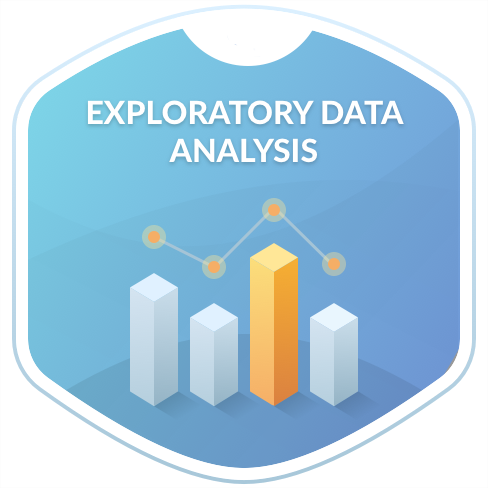

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [11]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [12]:
df.describe().T

count     mean      std    min     25%     50%      75%  \
cnt          17414.000 1143.102 1085.108  0.000 257.000 844.000 1671.750   
t1           17414.000   12.468    5.572 -1.500   8.000  12.500   16.000   
t2           17414.000   11.521    6.615 -6.000   6.000  12.500   16.000   
hum          17414.000   72.325   14.313 20.500  63.000  74.500   83.000   
wind_speed   17414.000   15.913    7.895  0.000  10.000  15.000   20.500   
weather_code 17414.000    2.723    2.341  1.000   1.000   2.000    3.000   
is_holiday   17414.000    0.022    0.147  0.000   0.000   0.000    0.000   
is_weekend   17414.000    0.285    0.452  0.000   0.000   0.000    1.000   
season       17414.000    1.492    1.119  0.000   0.000   1.000    2.000   

                  max  
cnt          7860.000  
t1             34.000  
t2             34.000  
hum           100.000  
wind_speed     56.500  
weather_code   26.000  
is_holiday      1.000  
is_weekend      1.000  
season          3.000

Deep Learning de Outlier ların, Machine Learning de olduğu kadar önemi bulunmamaktadır!

### Plot Breakdowns of Data

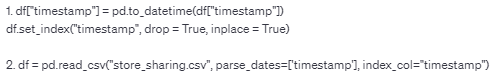

Datamızı indexe attığımız için buradan farklı feature ler çıkartabiliyoruz. Index e atılmasa idi "to_datetime" işlemini yaparak istediğimiz feature ları ortaya çıkarabilecektik. Yapılan analizde bize kolaylık sağlaması için Tarih sütununa bu şekilde bir işlem yaptık. 

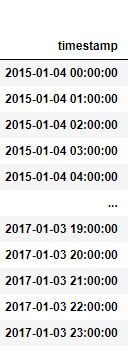

In [13]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

Yeni feature lerin df in sonuna eklendiğini görüyoruz..

In [14]:
df.sample(7)

cnt     t1     t2    hum  wind_speed  weather_code  \
timestamp                                                                  
2017-01-01 03:00:00   282  7.000  4.500 87.000      14.000         3.000   
2015-08-16 22:00:00   634 16.500 16.500 70.000       0.000         1.000   
2015-05-01 22:00:00   574  9.000  6.000 64.000      18.000         1.000   
2015-07-05 03:00:00   372 17.000 17.000 68.000       9.000         2.000   
2015-03-04 19:00:00  1476  8.000  5.500 57.000      13.000         2.000   
2015-12-15 13:00:00   877 12.000 12.000 91.000      16.000         3.000   
2016-10-01 04:00:00   193 13.000 13.000 88.000       6.500         2.000   

                     is_holiday  is_weekend  season  year  month  day  \
timestamp                                                               
2017-01-01 03:00:00       0.000       1.000   3.000  2017      1    1   
2015-08-16 22:00:00       0.000       1.000   1.000  2015      8   16   
2015-05-01 22:00:00       0.000       0.000   0.000  2015      5    1   
2015-07-05 03:00:00       0.000       1.000   1.000  2015      7    5   
2015-03-04 19:00:00       0.000       0.000   0.000  2015      3    4   
2015-12-15 13:00:00       0.000       0.000   3.000  2015     12   15   
2016-10-01 04:00:00       0.000       1.000   2.000  2016     10    1   

                     dayofweek  hour        date  
timestamp                                         
2017-01-01 03:00:00          6     3  2017-01-01  
2015-08-16 22:00:00          6    22  2015-08-16  
2015-05-01 22:00:00          4    22  2015-05-01  
2015-07-05 03:00:00          6     3  2015-07-05  
2015-03-04 19:00:00          2    19  2015-03-04  
2015-12-15 13:00:00          1    13  2015-12-15  
2016-10-01 04:00:00          5     4  2016-10-01

Season ların ne olduğu tam olarak belli olsun diye String olarak değiştirdik ve df in sonuna ekledik ki buradaki sayıların ne olduğunu tam olarak göreyim.

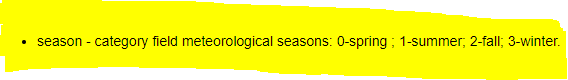

In [15]:
df['season_name'] = df['season'].replace({0:"Spring", 1:"Summer", 2:"Autumn", 3:"Winter"})

In [16]:
df.head()

cnt    t1    t2     hum  wind_speed  weather_code  \
timestamp                                                                
2015-01-04 00:00:00  182 3.000 2.000  93.000       6.000         3.000   
2015-01-04 01:00:00  138 3.000 2.500  93.000       5.000         1.000   
2015-01-04 02:00:00  134 2.500 2.500  96.500       0.000         1.000   
2015-01-04 03:00:00   72 2.000 2.000 100.000       0.000         1.000   
2015-01-04 04:00:00   47 2.000 0.000  93.000       6.500         1.000   

                     is_holiday  is_weekend  season  year  month  day  \
timestamp                                                               
2015-01-04 00:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 01:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 02:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 03:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 04:00:00       0.000       1.000   3.000  2015      1    4   

                     dayofweek  hour        date season_name  
timestamp                                                     
2015-01-04 00:00:00          6     0  2015-01-04      Winter  
2015-01-04 01:00:00          6     1  2015-01-04      Winter  
2015-01-04 02:00:00          6     2  2015-01-04      Winter  
2015-01-04 03:00:00          6     3  2015-01-04      Winter  
2015-01-04 04:00:00          6     4  2015-01-04      Winter

***i. Plot bike shares over time***


Bu kod, df veri çerçevesinin zamana karşı cnt (sayı) değişkeninin çizgi grafiğini oluşturur. Grafiğin boyutu figsize parametresiyle belirlenir (15 birim genişlik, 5 birim yükseklik). sns.lineplot() işlevi, x eksenine zamanı ve y eksenine cnt değerini yerleştirerek veriyi çizgi grafiği olarak temsil eder.

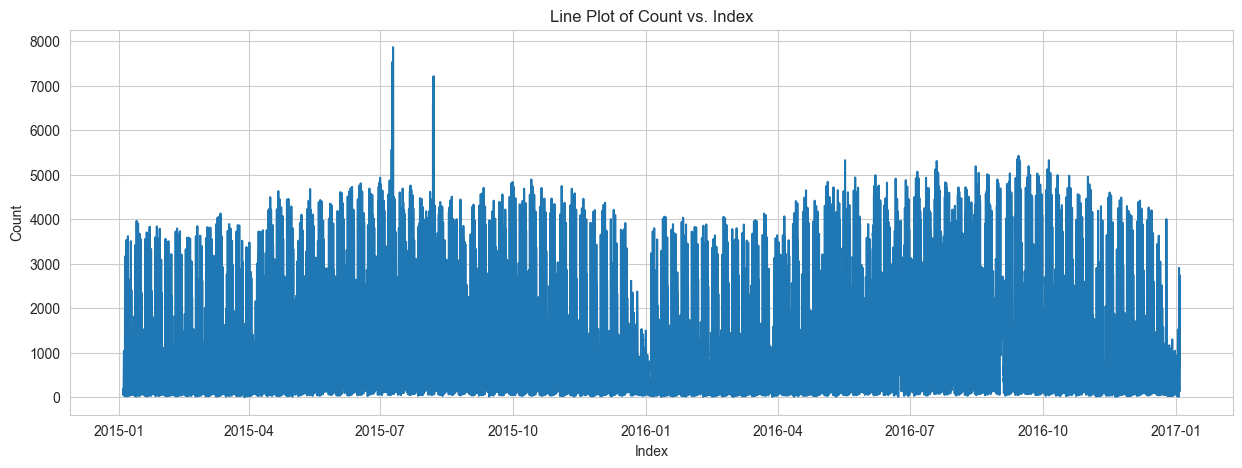

In [17]:
plt.figure(figsize=(15, 5))  # Set the figure size
sns.lineplot(x=df.index, y="cnt", data=df)  # Plot using Seaborn's lineplot function

plt.xlabel("Index")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title("Line Plot of Count vs. Index")  # Set the plot title
plt.show()  # Display the plot

Bu kod, df veri çerçevesindeki date sütununa göre gruplama yaparak günlük cnt (sayı) değerlerinin toplamını hesaplar. Sonuç olarak, her bir tarih için toplam kullanım sayısını içeren date_cnt serisini elde ederiz. Ardından, plt.figure(figsize=(15,5)) komutuyla grafiğin boyutunu belirleriz (15 birim genişlik, 5 birim yükseklik). sns.lineplot() işlevi, x eksenine tarihleri ve y eksenine toplam kullanım sayılarını yerleştirerek günlük kullanımı gösteren bir çizgi grafiği oluşturur. Bu şekilde, günlük kullanımın zaman içindeki değişimini görselleştirir.

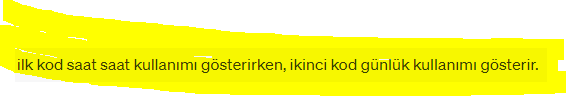

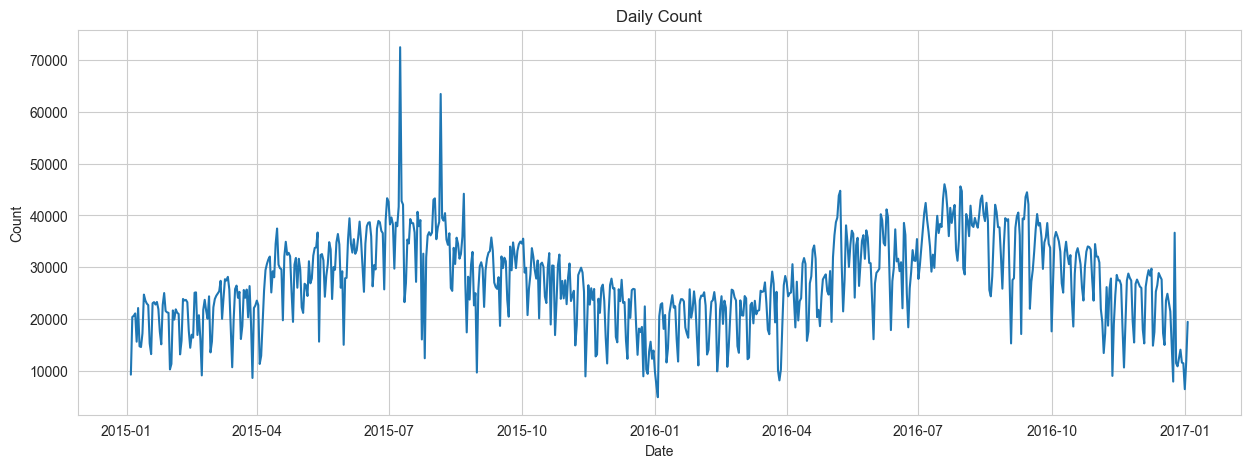

In [18]:
date_cnt = df.groupby("date")["cnt"].sum()   # Görseli sadeleştirmek için groupby ile günlük kullanımı

plt.figure(figsize=(15, 5))
sns.lineplot(x=date_cnt.index, y=date_cnt.values)

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Daily Count")
plt.show()

***ii. Plot bike shares by months***

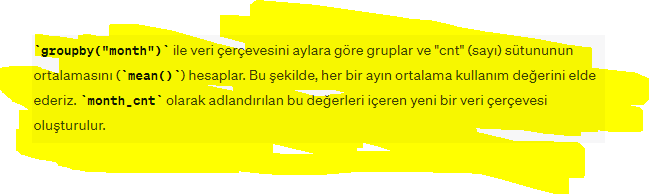

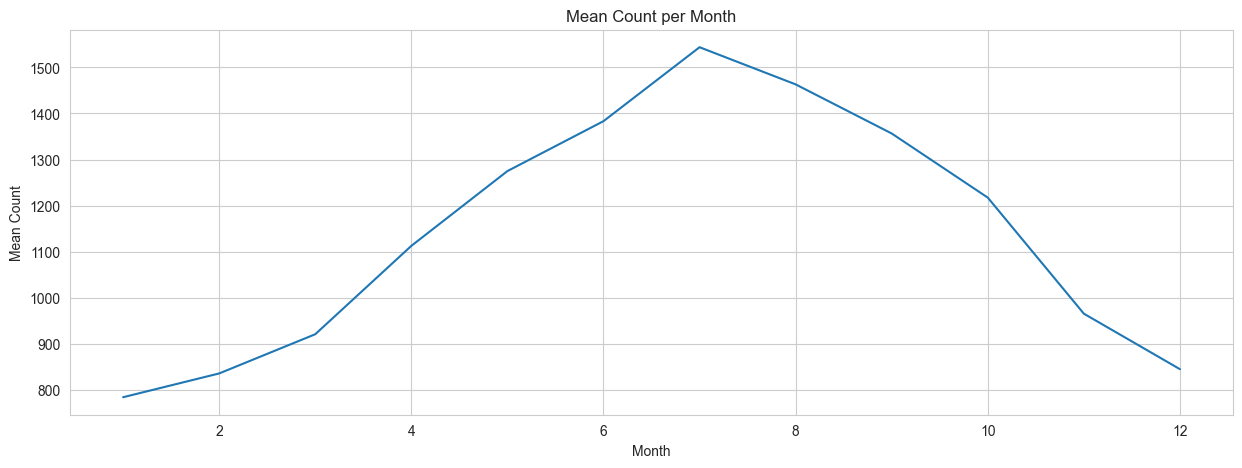

In [19]:
month_cnt = df.groupby("month")["cnt"].mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x=month_cnt.index, y=month_cnt.values)

plt.xlabel("Month")
plt.ylabel("Mean Count")
plt.title("Mean Count per Month")

plt.show()

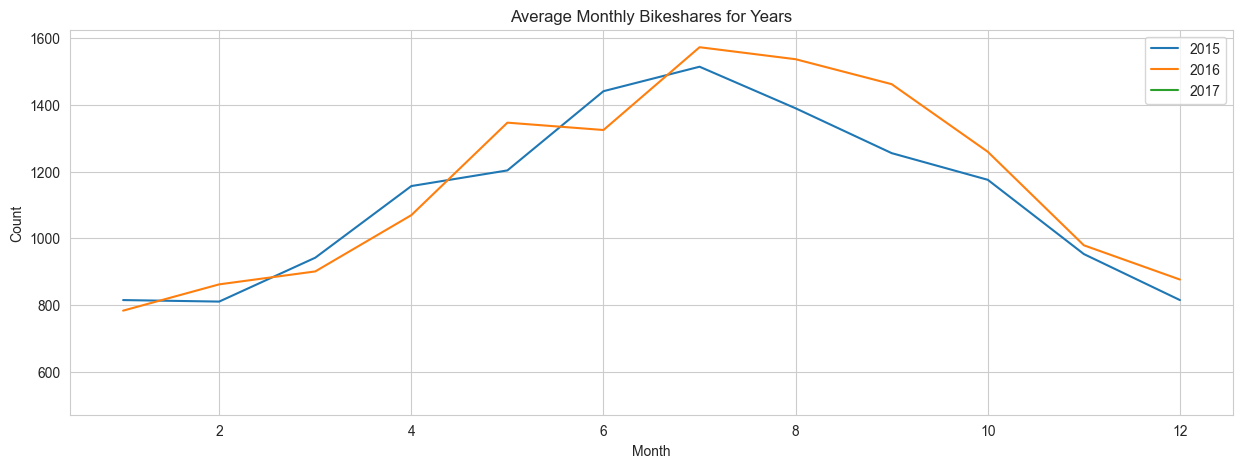

In [20]:
year_month_cnt = df.groupby(["year", "month"])["cnt"].mean()    # yıllara sari bir şekilde görmek istersek bunu yapıyoruz.

plt.figure(figsize=(15,5))        #2017 de çok az veri olduğu için burada göremiyoruz. 
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

groupby(["year", "month"]) ile veri çerçevesini yıllara ve aylara göre gruplar ve "cnt" (sayı) sütununun ortalamasını (mean()) hesaplar. Bu şekilde, her bir yılın her bir ay için ortalama kullanım değerini elde ederiz. year_month_cnt olarak adlandırılan bu değerleri içeren yeni bir veri çerçevesi oluşturulur.

Sonrasında, plt.figure(figsize=(15,5)) ile grafiğin boyutu belirlenir. for year in year_month_cnt.index.levels[0]: döngüsü ile her bir yılı dönerek, plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year) ile her bir yılın her bir ay için ortalama kullanım değerini içeren çizgi grafiği çizdiririz. Bu şekilde, yıllara göre aylık kullanımın değişimini ve yıllar arasındaki karşılaştırmayı görselleştiririz.

Özetle, veriyi yıllara ve aylara göre gruplayarak her bir yılın her bir ay için ortalama kullanımını hesaplayıp çizgi grafiği ile göstermiş oluyoruz. Bu sayede yıllar ve aylar arasındaki kullanım eğilimini inceleyebilir ve yıllar arasındaki karşılaştırmayı yapabiliriz.

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

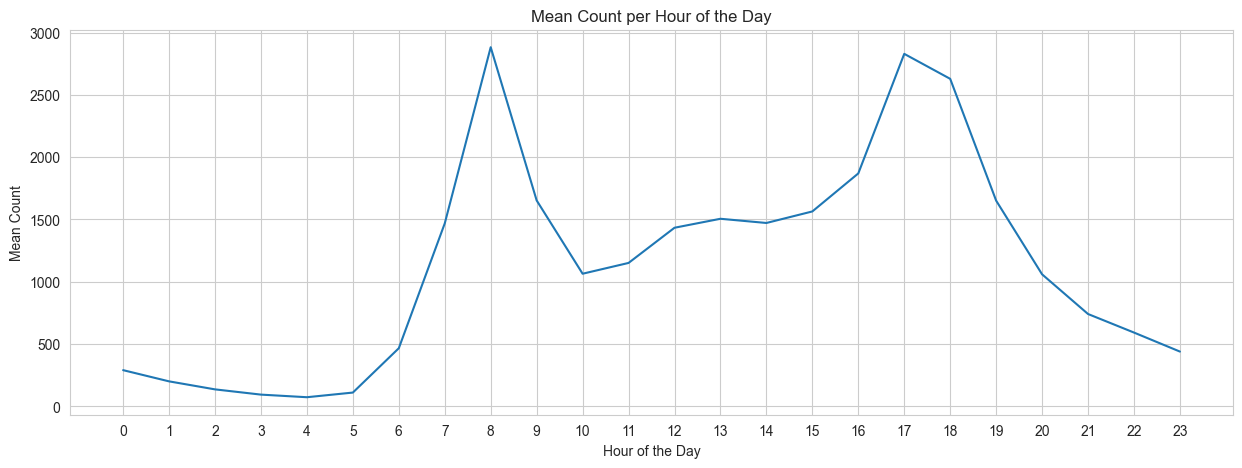

In [21]:
hour_cnt = df.groupby("hour")["cnt"].mean()

plt.figure(figsize=(15, 5))
plt.xticks(np.arange(24))
sns.lineplot(x=hour_cnt.index, y=hour_cnt.values)

plt.xlabel("Hour of the Day")
plt.ylabel("Mean Count")
plt.title("Mean Count per Hour of the Day")

plt.show()

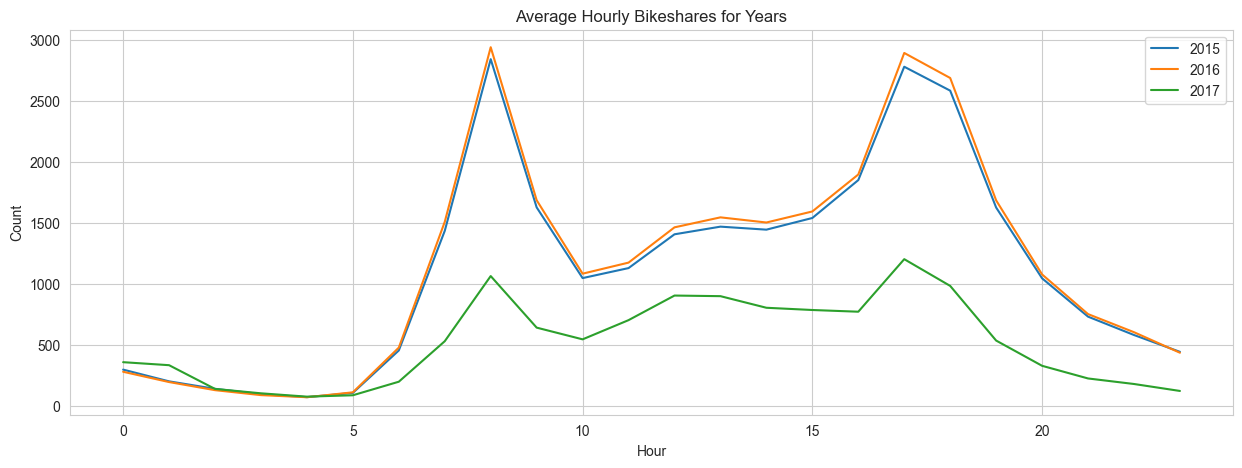

In [22]:
year_hour_cnt = df.groupby(["year", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_hour_cnt[year].index, year_hour_cnt[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Years')
plt.show()

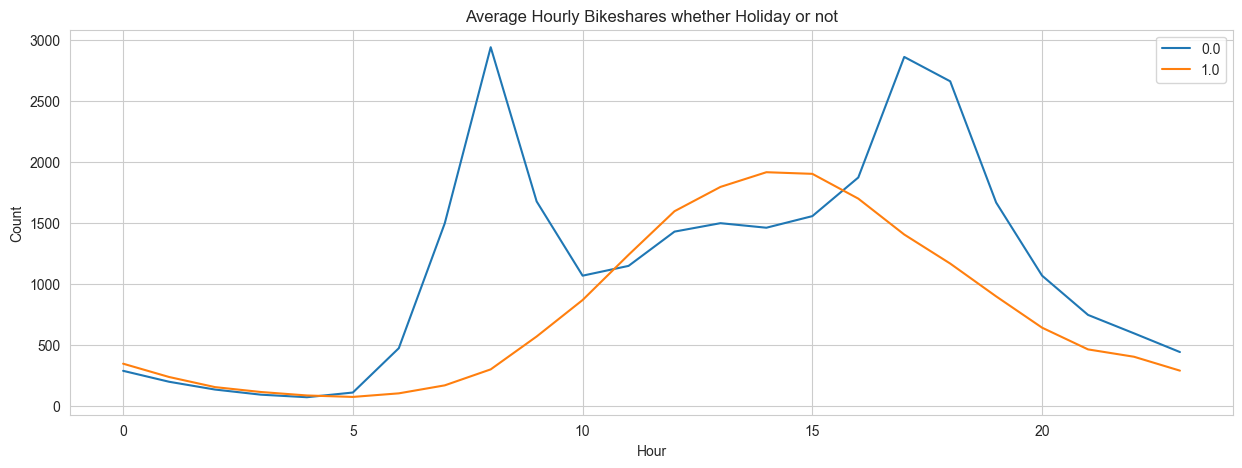

In [23]:
hour_holiday_cnt = df.groupby(["is_holiday","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for is_holiday in hour_holiday_cnt.index.levels[0]:
    plt.plot(hour_holiday_cnt[is_holiday].index, hour_holiday_cnt[is_holiday], label=is_holiday)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Holiday or not')
plt.show()

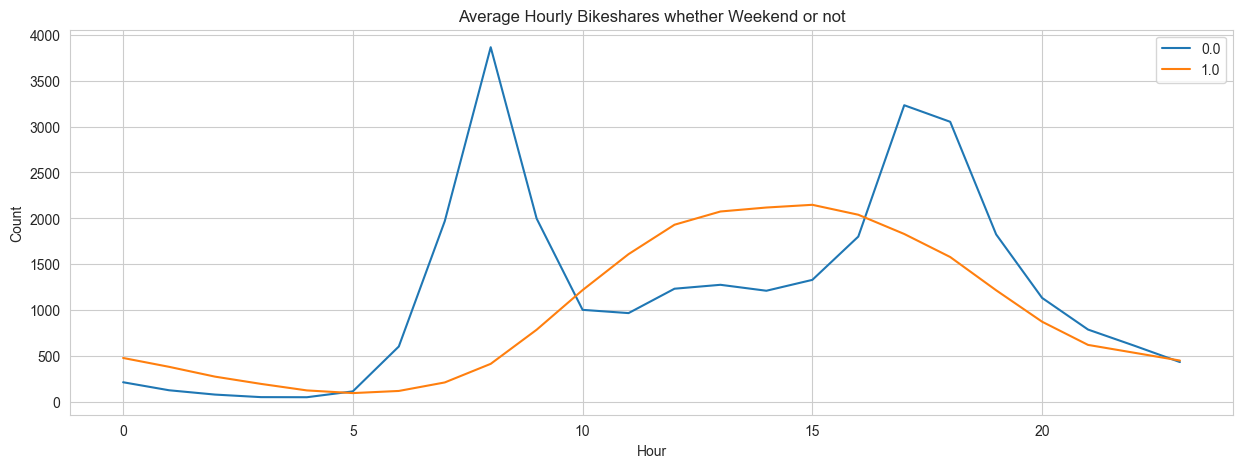

In [24]:
hour_weekend_cnt = df.groupby(["is_weekend","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for is_weekend in hour_weekend_cnt.index.levels[0]:
    plt.plot(hour_weekend_cnt[is_weekend].index, hour_weekend_cnt[is_weekend], label=is_weekend)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Weekend or not')
plt.show()

sıcak havalarda daha fazla bisiklete binildiği görülmüş oluyor.

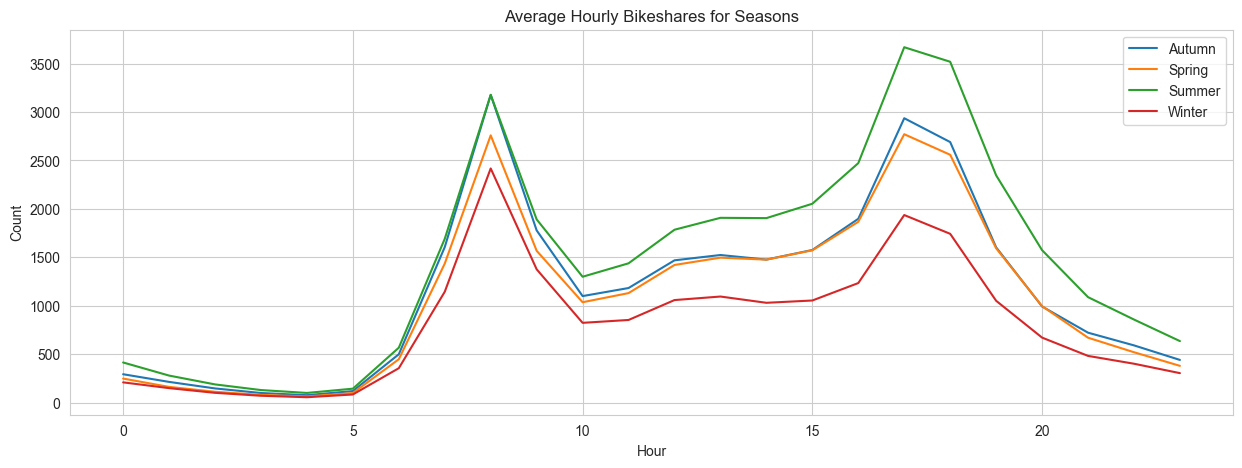

In [25]:
season_hour_cnt = df.groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_hour_cnt.index.levels[0]:
    plt.plot(season_hour_cnt[season].index, season_hour_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Seasons')
plt.show()

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

hafta içi daha fazla hafta sonu bisiklet kullanımı daha az olarak gözükmektedir. 

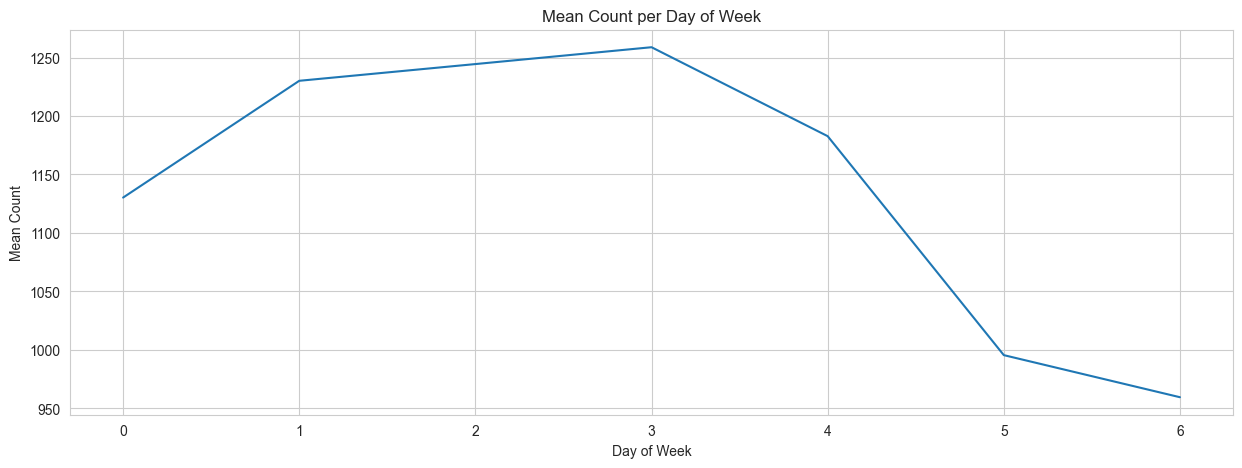

In [26]:
weekday_cnt = df.groupby("dayofweek")["cnt"].mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x=weekday_cnt.index, y=weekday_cnt.values)

plt.xlabel("Day of Week")
plt.ylabel("Mean Count")
plt.title("Mean Count per Day of Week")

plt.show()

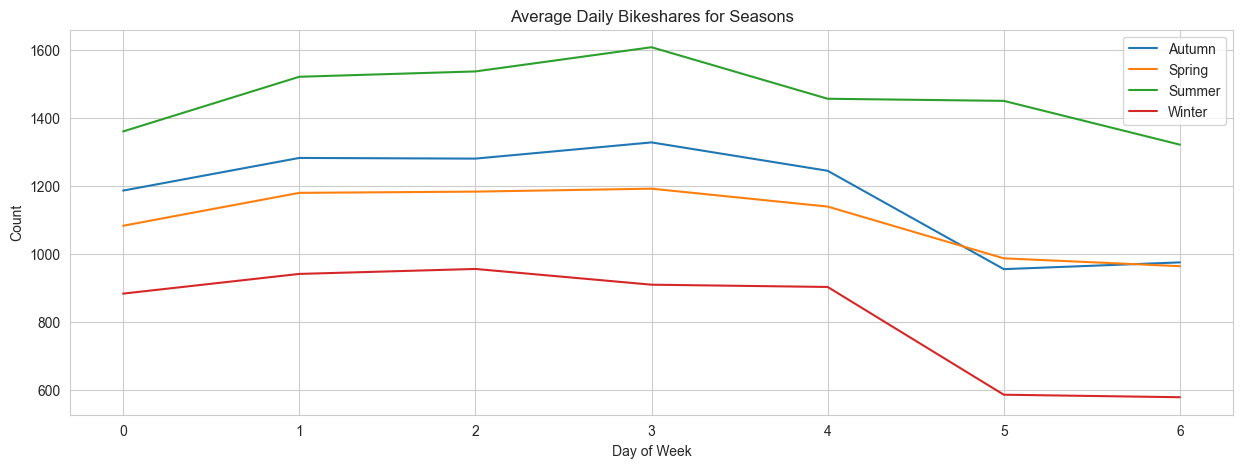

In [27]:
season_dayofweek_cnt = df.groupby(["season_name", "dayofweek"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_dayofweek_cnt.index.levels[0]:
    plt.plot(season_dayofweek_cnt[season].index, season_dayofweek_cnt[season],label=season)

plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Daily Bikeshares for Seasons')
plt.show()

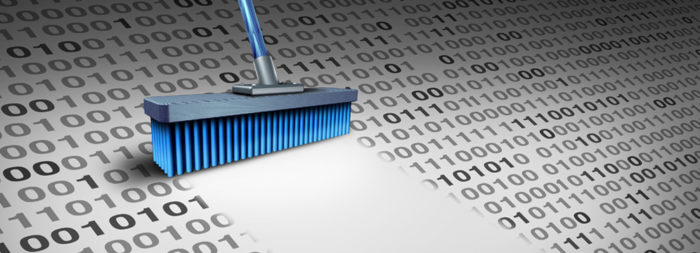

### Drop unnecessary columns

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 

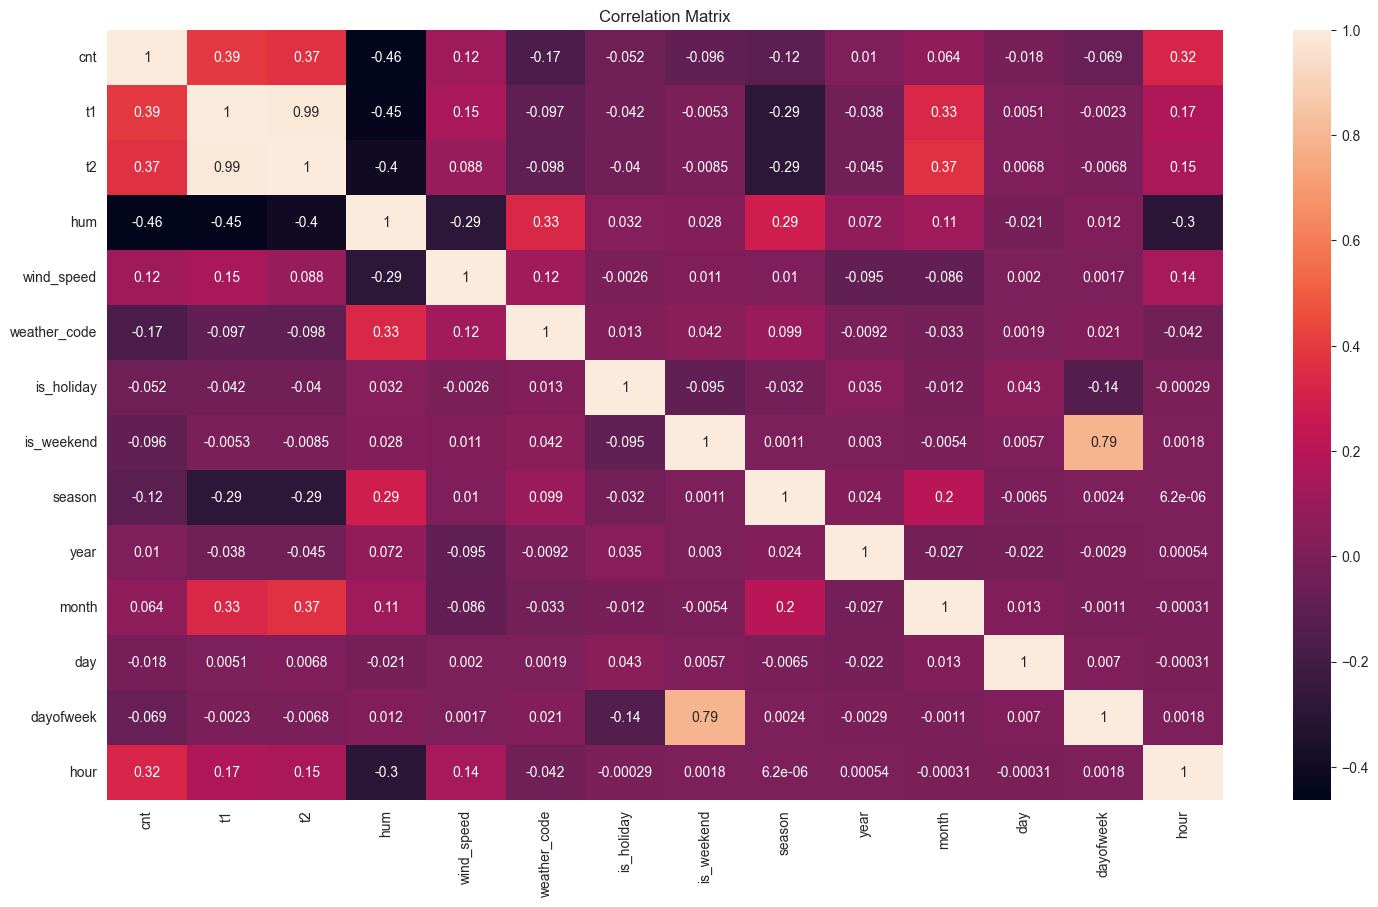

In [28]:
numerical_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini oluşturalım
correlation_matrix = numerical_df.corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


t1 ve t2 ile çok yüksek bir korelasyon var.. Biri normal sıcaklık diğeri hissedilen sıcaklık değeri..

In [29]:
df.head()

cnt    t1    t2     hum  wind_speed  weather_code  \
timestamp                                                                
2015-01-04 00:00:00  182 3.000 2.000  93.000       6.000         3.000   
2015-01-04 01:00:00  138 3.000 2.500  93.000       5.000         1.000   
2015-01-04 02:00:00  134 2.500 2.500  96.500       0.000         1.000   
2015-01-04 03:00:00   72 2.000 2.000 100.000       0.000         1.000   
2015-01-04 04:00:00   47 2.000 0.000  93.000       6.500         1.000   

                     is_holiday  is_weekend  season  year  month  day  \
timestamp                                                               
2015-01-04 00:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 01:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 02:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 03:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 04:00:00       0.000       1.000   3.000  2015      1    4   

                     dayofweek  hour        date season_name  
timestamp                                                     
2015-01-04 00:00:00          6     0  2015-01-04      Winter  
2015-01-04 01:00:00          6     1  2015-01-04      Winter  
2015-01-04 02:00:00          6     2  2015-01-04      Winter  
2015-01-04 03:00:00          6     3  2015-01-04      Winter  
2015-01-04 04:00:00          6     4  2015-01-04      Winter

weather code ı daha iyi anlamak adına gruplandırıyoruz. Weather code küçükse hava durumu iyi yüksekse kötü oluyor.

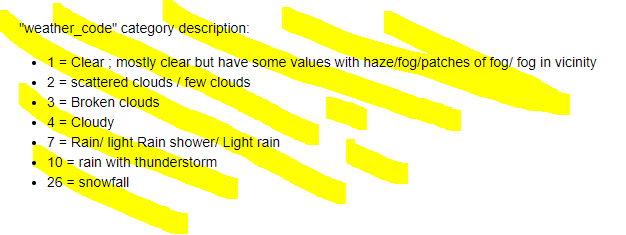

weather_code
1.000    1162.089
2.000    1496.177
3.000    1195.124
4.000     635.231
7.000     712.966
10.000    583.429
26.000    250.850
Name: cnt, dtype: float64


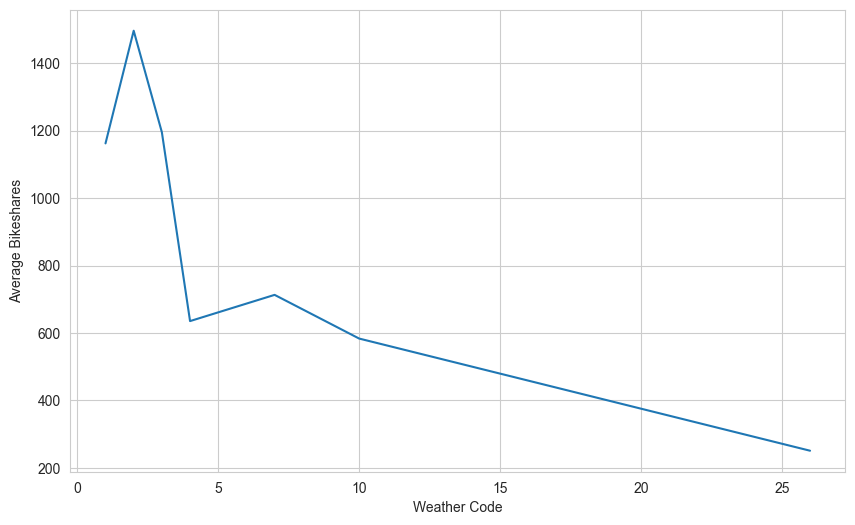

In [30]:
plt.figure(figsize=(10,6))
ax = df.groupby('weather_code')['cnt'].mean().plot()
ax.set(xlabel='Weather Code')
ax.set(ylabel='Average Bikeshares')
print(df.groupby('weather_code')['cnt'].mean())

Time Series datalar da ilgisiz sütunlar genel itibari ile düşülür.

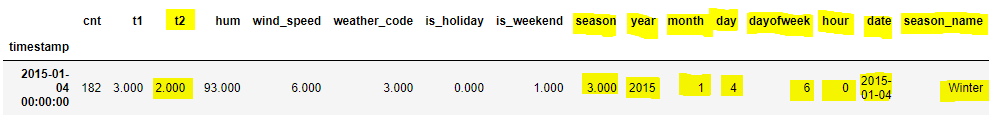

In [32]:
df_raw = df.drop(["t2", "date", "year", "season_name", "season", "month", "dayofweek", "day", "hour"], axis=1)

In [33]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   hum           17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  float64
 5   is_holiday    17414 non-null  float64
 6   is_weekend    17414 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


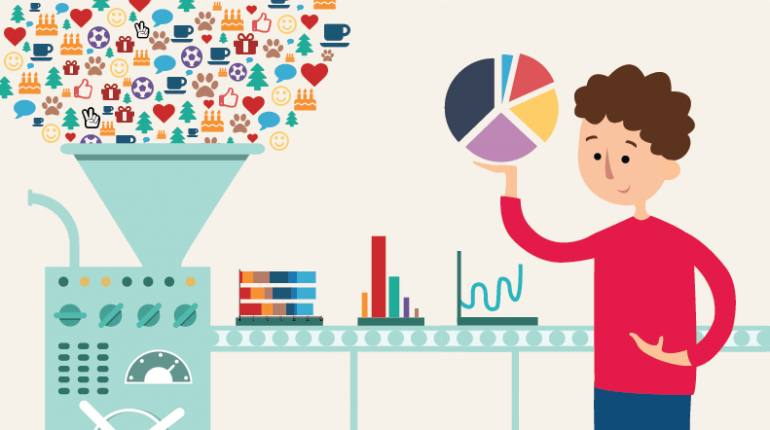

## 2. Data Pre-Processing

### Train - Test Split

Appropriately split the data for optimum training.

"weather code" ı get_dummies yapıyoruz..

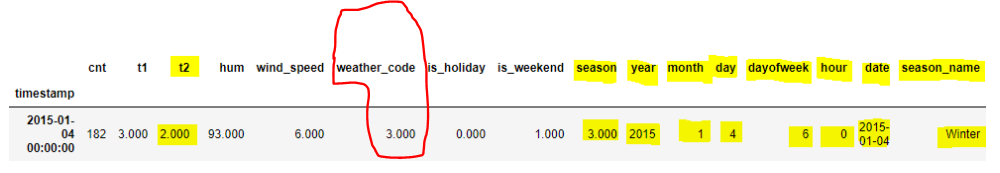

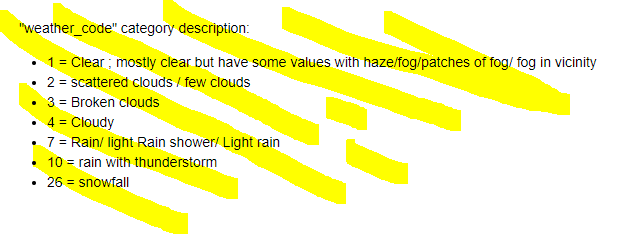

In [34]:
weather_dummy = pd.get_dummies(df_raw['weather_code'].astype("str"), prefix="w_code", drop_first=True)
df_dum = pd.concat([df_raw, weather_dummy],axis=1).drop(["weather_code"],axis=1)
df_dum.head()

cnt    t1     hum  wind_speed  is_holiday  is_weekend  \
timestamp                                                                    
2015-01-04 00:00:00  182 3.000  93.000       6.000       0.000       1.000   
2015-01-04 01:00:00  138 3.000  93.000       5.000       0.000       1.000   
2015-01-04 02:00:00  134 2.500  96.500       0.000       0.000       1.000   
2015-01-04 03:00:00   72 2.000 100.000       0.000       0.000       1.000   
2015-01-04 04:00:00   47 2.000  93.000       6.500       0.000       1.000   

                     w_code_10.0  w_code_2.0  w_code_26.0  w_code_3.0  \
timestamp                                                               
2015-01-04 00:00:00        False       False        False        True   
2015-01-04 01:00:00        False       False        False       False   
2015-01-04 02:00:00        False       False        False       False   
2015-01-04 03:00:00        False       False        False       False   
2015-01-04 04:00:00        False       False        False       False   

                     w_code_4.0  w_code_7.0  
timestamp                                    
2015-01-04 00:00:00       False       False  
2015-01-04 01:00:00       False       False  
2015-01-04 02:00:00       False       False  
2015-01-04 03:00:00       False       False  
2015-01-04 04:00:00       False       False

7 feature böylece 12 feature e dönüşmüş oldu. 

In [35]:
df_dum.shape

(17414, 12)

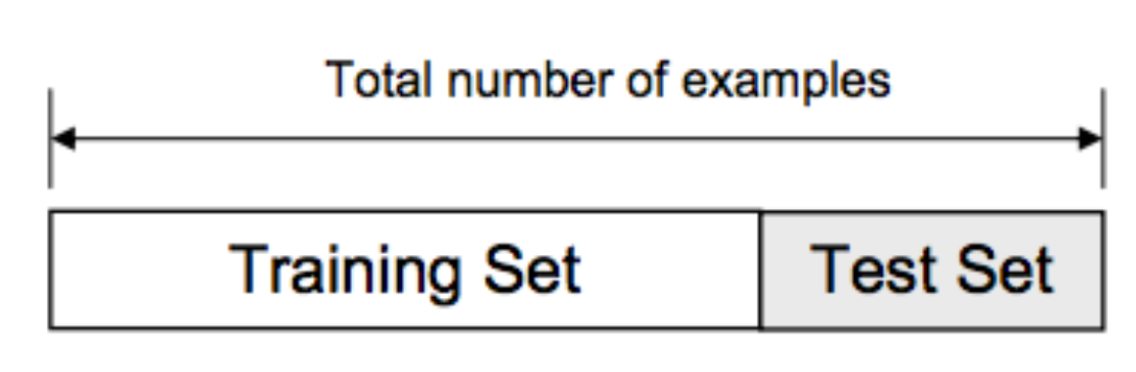

In [36]:
train_size = int(len(df_dum) * 0.9)
test_size = len(df_dum) - train_size

train, test = df_dum.iloc[0:train_size], df_dum.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [37]:
train.shape

(15672, 12)

In [38]:
test.shape

(1742, 12)

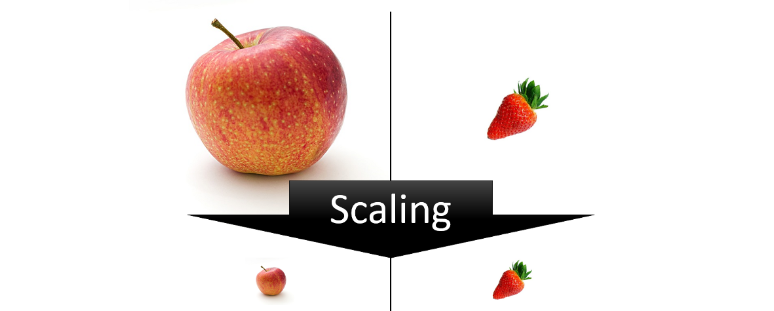

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

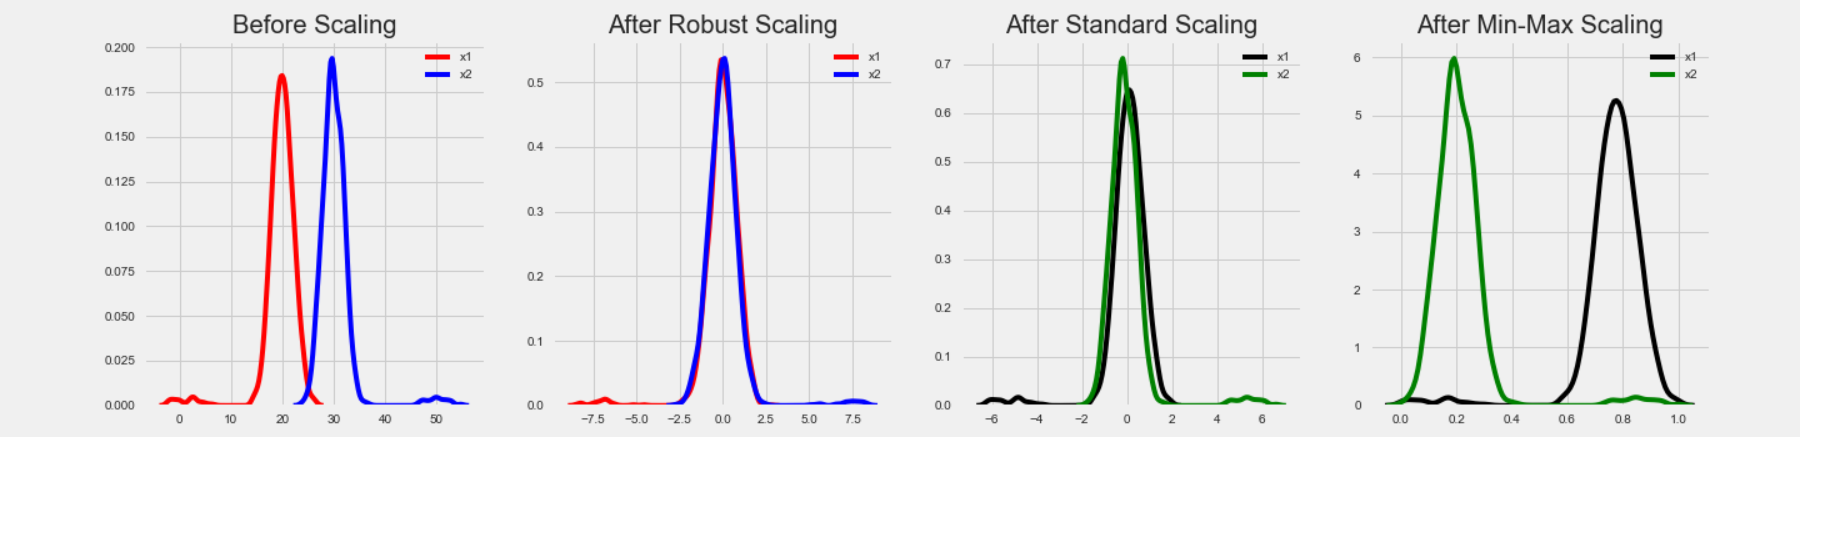

In [39]:
from sklearn.preprocessing import RobustScaler

Robust Scaling, verilerin ortanca ve yüzdelik dilimlere dayalı olarak ölçeklendirilmesini sağlar. Bu nedenle, aykırı değerlerin etkisi azaltılır ve LSTM modelinin daha dengeli bir şekilde eğitilmesine yardımcı olur.

Tek feature olduğu zaman; tüm datayı minmax yapmış, sonrasında feature ın train datasını fit ve transfer yaparken, test olan datasını ise sadece fit yapmıştık. 

Dummy yapmış olduğumuz feature leri scale e dahil etmeyeceğiz. ZATEN 0 İLE 1 ARASINDA YER ALDIKLARI İÇİN. 

In [40]:
df_dum.columns

Index(['cnt', 't1', 'hum', 'wind_speed', 'is_holiday', 'is_weekend',
       'w_code_10.0', 'w_code_2.0', 'w_code_26.0', 'w_code_3.0', 'w_code_4.0',
       'w_code_7.0'],
      dtype='object')

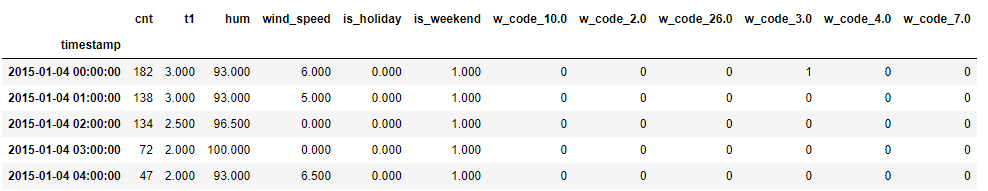

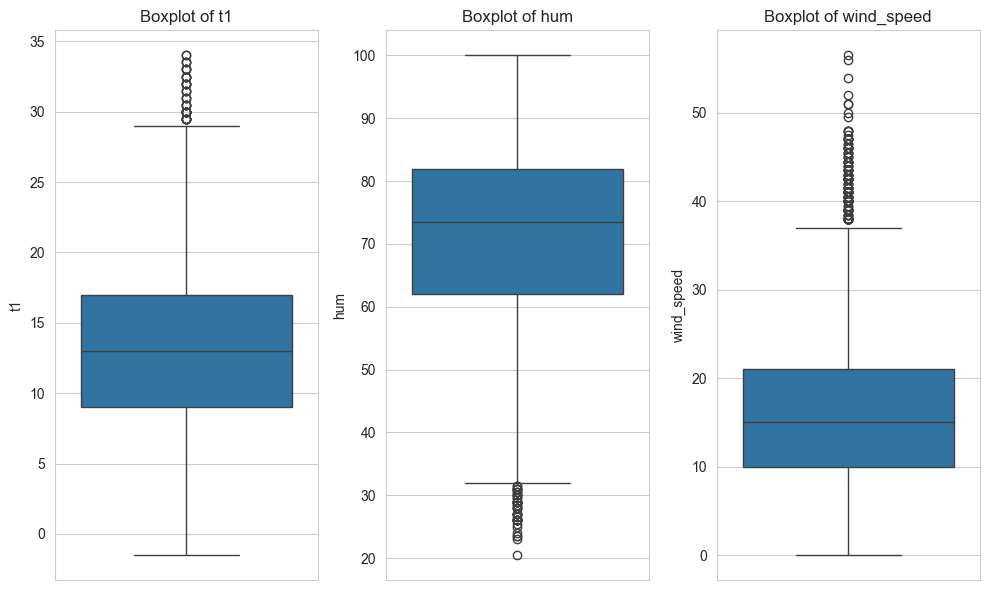

In [41]:
f_columns = ['t1', 'hum', 'wind_speed']
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)  # 1 satır, 3 sütun, 1. grafik
sns.boxplot(y=train['t1'])
plt.title('Boxplot of t1')

plt.subplot(1, 3, 2)  # 1 satır, 3 sütun, 2. grafik
sns.boxplot(y=train['hum'])
plt.title('Boxplot of hum')

plt.subplot(1, 3, 3)  # 1 satır, 3 sütun, 3. grafik
sns.boxplot(y=train['wind_speed'])
plt.title('Boxplot of wind_speed')

plt.tight_layout()  # Grafikler arasındaki boşlukları ayarlar
plt.show()

Datamızda Target label ımız CNT olacak yani COUNT..

Daha sonra sadece Target sütunumuzu INVERSE TRANSFORM yapacağımız için bunu burada ayırmamız gerekiyor ve ona ayrı bir scale yapmamamız gerekiyor. Tek feature de şu şekilde idi:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [42]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()   # feature ler için kullanılan scale
target_transformer = RobustScaler()   # target için kullanılan scale

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
#  train.loc[:, f_columns] ifadesi, train veri setindeki tüm satırları ve f_columns listesinde belirtilen sütunları seçer
train['cnt'] = target_transformer.fit_transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
#test.loc[:, f_columns] ifadesi, test veri setindeki tüm satırları ve f_columns listesinde belirtilen sütunları seçer. 

test['cnt'] = target_transformer.transform(test[['cnt']])

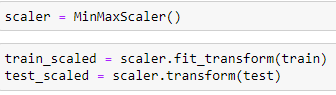

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

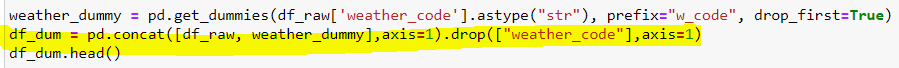

In [43]:
train

cnt     t1   hum  wind_speed  is_holiday  is_weekend  \
timestamp                                                                     
2015-01-04 00:00:00 -0.465 -1.250 0.975      -0.818       0.000       1.000   
2015-01-04 01:00:00 -0.495 -1.250 0.975      -0.909       0.000       1.000   
2015-01-04 02:00:00 -0.498 -1.312 1.150      -1.364       0.000       1.000   
2015-01-04 03:00:00 -0.541 -1.375 1.325      -1.364       0.000       1.000   
2015-01-04 04:00:00 -0.558 -1.375 0.975      -0.773       0.000       1.000   
...                    ...    ...   ...         ...         ...         ...   
2016-10-23 03:00:00 -0.441 -0.625 0.825      -0.818       0.000       1.000   
2016-10-23 04:00:00 -0.487 -0.625 0.975      -0.818       0.000       1.000   
2016-10-23 05:00:00 -0.517 -0.625 0.675      -1.000       0.000       1.000   
2016-10-23 06:00:00 -0.517 -0.625 0.825      -0.773       0.000       1.000   
2016-10-23 07:00:00 -0.471 -0.688 0.825      -0.818       0.000       1.000   

                     w_code_10.0  w_code_2.0  w_code_26.0  w_code_3.0  \
timestamp                                                               
2015-01-04 00:00:00        False       False        False        True   
2015-01-04 01:00:00        False       False        False       False   
2015-01-04 02:00:00        False       False        False       False   
2015-01-04 03:00:00        False       False        False       False   
2015-01-04 04:00:00        False       False        False       False   
...                          ...         ...          ...         ...   
2016-10-23 03:00:00        False        True        False       False   
2016-10-23 04:00:00        False        True        False       False   
2016-10-23 05:00:00        False       False        False        True   
2016-10-23 06:00:00        False       False        False        True   
2016-10-23 07:00:00        False       False        False       False   

                     w_code_4.0  w_code_7.0  
timestamp                                    
2015-01-04 00:00:00       False       False  
2015-01-04 01:00:00       False       False  
2015-01-04 02:00:00       False       False  
2015-01-04 03:00:00       False       False  
2015-01-04 04:00:00       False       False  
...                         ...         ...  
2016-10-23 03:00:00       False       False  
2016-10-23 04:00:00       False       False  
2016-10-23 05:00:00       False       False  
2016-10-23 06:00:00       False       False  
2016-10-23 07:00:00       False       False  

[15672 rows x 12 columns]

In [44]:
def create_dataset(X, y, time_steps=1):  # buraya X ve y train i vereceğiz.
   
    Xs, ys = [], []   # 2 tane boş liste oluşturuyor ve bunlara X ve y train leri atayacağız. 
    for i in range(len(X) - time_steps):      # length i ne ise oraya kadar gidecek.
        v = X.iloc[i:(i + time_steps)].values # her döngüde bana verdiğim train data sını O İLE 1 arasını value yani data frame olarak al
        Xs.append(v)                          # bu değeri ilk listenin içine at. paketler halinde atacak.. 0.24, 1-25 etc..
        ys.append(y.iloc[i + time_steps])   # bu sefer i (0) + 23 (indes) yani 24 nci datayı y ye koy
    return np.array(Xs), np.array(ys)  # daha sonra bunları array e çevir..

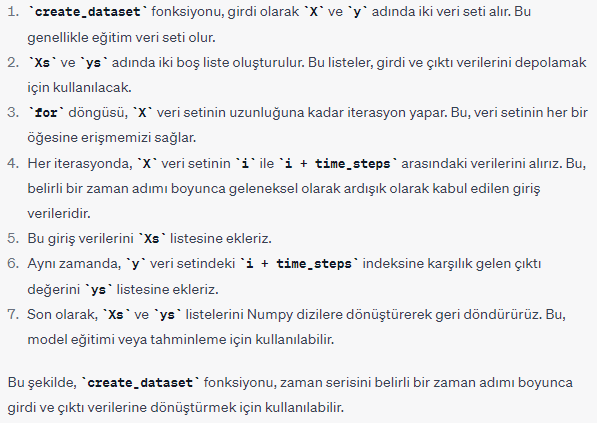

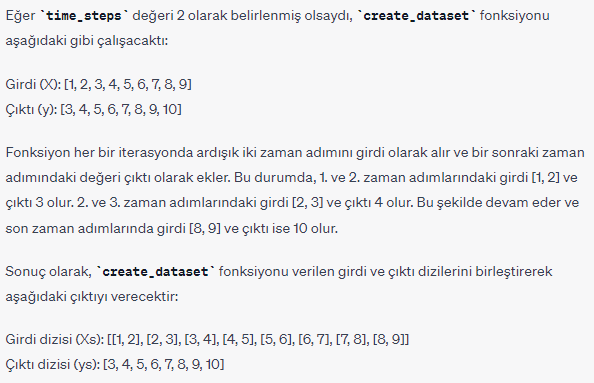

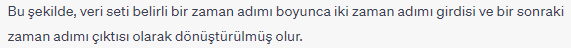

Yukarida olusturdugumuz create_dataset fonksyionunu kullanarak X_train ve y_train' i olusturduk.

In [45]:
time_steps = 24  

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# reshape to [samples, time_steps, n_features]

(15648, 24, 12) (15648,)
(1718, 24, 12) (1718,)


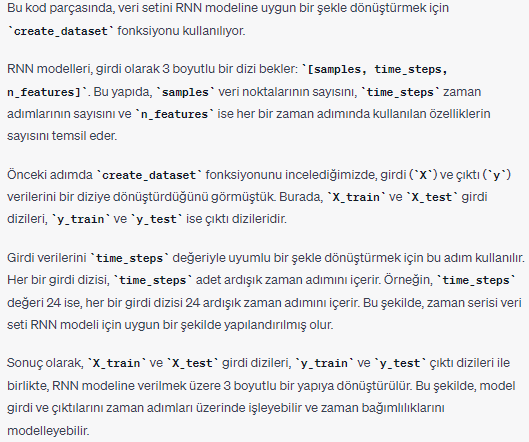

In [46]:
X_train

array([[[-0.46487603305785125, -1.25, 0.975, ..., True, False, False],
        [-0.4951790633608815, -1.25, 0.975, ..., False, False, False],
        [-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        ...,
        [-0.4380165289256198, -1.25, 0.975, ..., False, True, False],
        [-0.46763085399449034, -1.25, 0.975, ..., False, True, False],
        [-0.4820936639118457, -1.125, 0.675, ..., False, True, False]],

       [[-0.4951790633608815, -1.25, 0.975, ..., False, False, False],
        [-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        [-0.540633608815427, -1.375, 1.325, ..., False, False, False],
        ...,
        [-0.46763085399449034, -1.25, 0.975, ..., False, True, False],
        [-0.4820936639118457, -1.125, 0.675, ..., False, True, False],
        [-0.5330578512396694, -1.125, 0.975, ..., False, True, False]],

       [[-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        [-0.540633608815427, -1.375, 1.325

In [47]:
X_train[0]

array([[-0.46487603305785125, -1.25, 0.975, -0.8181818181818182, 0.0,
        1.0, False, False, False, True, False, False],
       [-0.4951790633608815, -1.25, 0.975, -0.9090909090909091, 0.0, 1.0,
        False, False, False, False, False, False],
       [-0.49793388429752067, -1.3125, 1.15, -1.3636363636363635, 0.0,
        1.0, False, False, False, False, False, False],
       [-0.540633608815427, -1.375, 1.325, -1.3636363636363635, 0.0, 1.0,
        False, False, False, False, False, False],
       [-0.5578512396694215, -1.375, 0.975, -0.7727272727272727, 0.0,
        1.0, False, False, False, False, False, False],
       [-0.5585399449035813, -1.375, 0.975, -1.0, 0.0, 1.0, False, False,
        False, False, False, False],
       [-0.5550964187327824, -1.5, 1.325, -0.7272727272727273, 0.0, 1.0,
        False, False, False, False, True, False],
       [-0.5385674931129476, -1.5, 1.325, -0.7272727272727273, 0.0, 1.0,
        False, False, False, False, True, False],
       [-0.5, -

In [48]:
y_train[0]

-0.5330578512396694

In [49]:
X_test

array([[[-0.37052341597796146, -0.625, 0.675, ..., False, False, False],
        [-0.07782369146005509, -0.4375, 0.275, ..., False, False, False],
        [0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        ...,
        [-0.5034435261707989, -0.375, 0.275, ..., False, False, False],
        [-0.18732782369146006, -0.3125, 0.3, ..., False, False, True],
        [0.768595041322314, -0.25, 0.3, ..., False, False, False]],

       [[-0.07782369146005509, -0.4375, 0.275, ..., False, False, False],
        [0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        [0.7183195592286501, -0.125, -0.2, ..., False, False, False],
        ...,
        [-0.18732782369146006, -0.3125, 0.3, ..., False, False, True],
        [0.768595041322314, -0.25, 0.3, ..., False, False, False],
        [2.1542699724517904, -0.25, 0.175, ..., False, False, False]],

       [[0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        [0.7183195592286501, -0.125, -0.2, ..

In [50]:
y_test[0]

2.1542699724517904

---
---

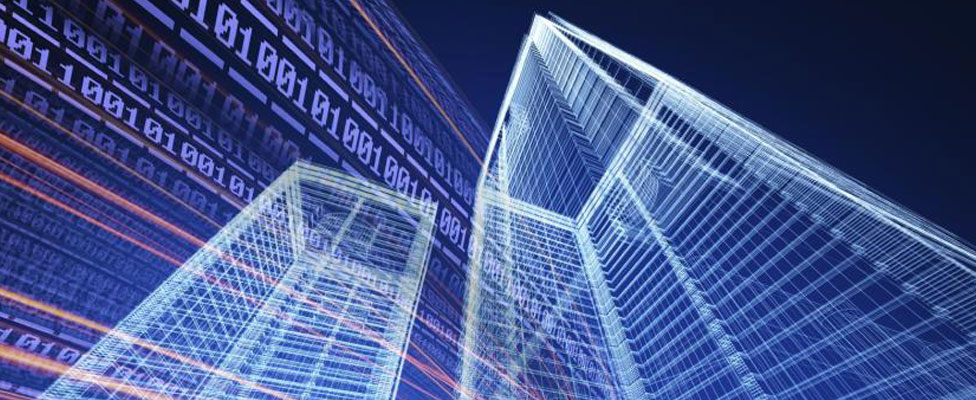

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






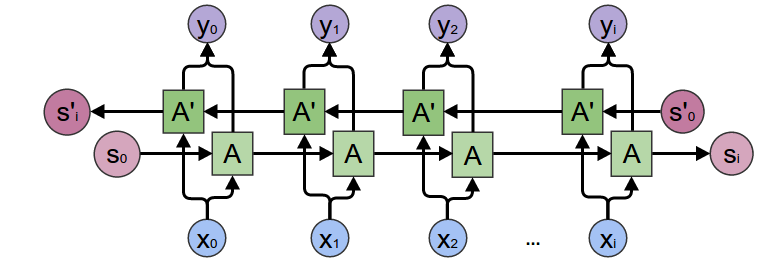

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
X_train.shape

(15648, 24, 12)

Modelin genişliğini arttırmaktansa deep liğini arttırmakta fayda var.

Burada X_train.shape[2] ifadesindeki 2, X_train veri setinin boyutlarından üçüncü boyutu ifade etmektedir.

Genellikle, makine öğrenimi problemlerinde veri setleri 2D (örneğin, tablo şeklinde) veya 3D (örneğin, görüntü veya zaman serisi verileri) şeklinde olabilir. 3D veri setlerinde, veriler bir dizi olarak temsil edilir ve üçüncü boyut, veri noktalarının farklı özelliklerini temsil eder.

Örneğin, bir zaman serisi veri seti düşünelim. Her bir veri noktası, zaman adımlarında ölçülen değerlerden oluşur. Bu durumda, X_train veri setinin şekli (örneğin) (100, 10, 3) olabilir. Burada 100, veri noktalarının sayısını, 10, her bir veri noktasında zaman adımlarının sayısını ve 3, her bir zaman adımında ölçülen özelliklerin sayısını temsil eder.

Bu nedenle, X_train.shape[2] ifadesi, X_train veri setinin üçüncü boyutunun boyutunu verir, yani her bir veri noktasında bulunan özelliklerin sayısını temsil eder.

In [53]:
y_train.shape

(15648,)

In [54]:
n_features = X_train.shape[2]

In [55]:
print(n_features)

12


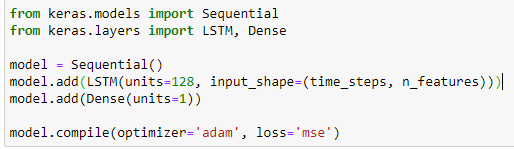

In [56]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))   #24 e 12 lik bir veri bekleyecek benden
#BIDIRECTIONAL ın yaptığı iş burada; (düz ve ters toplamı)
# 24 lük serilerimi önce 1 den 24 e kadar al sonra 24 den geriye doğru al ve bu ikisinin toplamının sonuçlarını bir sonraki katmana aktar. 
#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [57]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

restore_best_weights=True parametresi, eğitim sırasında erken durdurma (early stopping) kullanıldığında en iyi performans gösteren modelin ağırlıklarının geri yüklenmesini sağlar.

Erken durdurma, modelin eğitim sürecini kontrol etmek için kullanılan bir yöntemdir. Eğitim ilerledikçe, genellikle eğitim hatası (loss) azalırken doğrulama hatası artar. Ancak, doğrulama hatasının artması, modelin aşırı uyum (overfitting) yapabileceğini ve genelleme yeteneğinin azaldığını gösterebilir.

Erken durdurma, belirli bir sabır (patience) değerini belirleyerek doğrulama hatasının belirli bir süre boyunca azalmaması durumunda eğitimi durdurur. Bu, aşırı uyumu önlemek ve daha iyi bir genelleme yapmak için kullanışlı bir yöntemdir.

restore_best_weights=True parametresi, erken durdurma işlemi sonunda en iyi performans gösteren modelin ağırlıklarının geri yüklenmesini sağlar. Bu şekilde, erken durdurmaya karar verilen noktada kaydedilen en iyi modelin ağırlıkları kullanılır. Böylece, model eğitimi durdurulduğunda en iyi performans elde edilen noktada kalır ve bu ağırlıklar kullanılarak tahmin yapılır.

Bu yöntem, genellikle aşırı uyumu önlemek ve daha iyi bir genelleme yapmak için kullanılır.

In [57]:
#patience=5 dediğimizde sondan 5'nci değer benim en iyi değerim..
# en iyi ağırlığın olduğu yeri al diyoruz restore_best_weights ile..bunu demez isek en sondakini alır.. 
# ama en iyi değer farklı bir yerde de olabilir. en sondaki en iyiye göre düşük olacaktır muhtemelen.. 

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 RNN'de validation_split kullanımı, veri setini rastgele bölerken sıralamayı bozmaz ve zaman serileri üzerinde doğru sonuçlar elde etmek için uygun bir yaklaşımdır.

In [59]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [60]:
X_test = X_train.astype('float32')
y_test = y_train.astype('float32')

In [61]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - loss: 0.2224 - val_loss: 0.0757
Epoch 2/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - loss: 0.0529 - val_loss: 0.0403
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - loss: 0.0313 - val_loss: 0.0277
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - loss: 0.0250 - val_loss: 0.0278
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - loss: 0.0200 - val_loss: 0.0273
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - loss: 0.0196 - val_loss: 0.0224
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - loss: 0.0164 - val_loss: 0.0235
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 32s 93ms/step - loss: 0.0168 - val_loss: 0.0241
Epoch 9/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - loss: 0.0136 - val_loss: 0.0213
Epoch 10/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.0135 - val_loss: 0.0196
Epoch 11/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - loss: 0.0131 - val_loss: 0.0201
Epoch 12/30
343/343 ━━━━━━━━━━

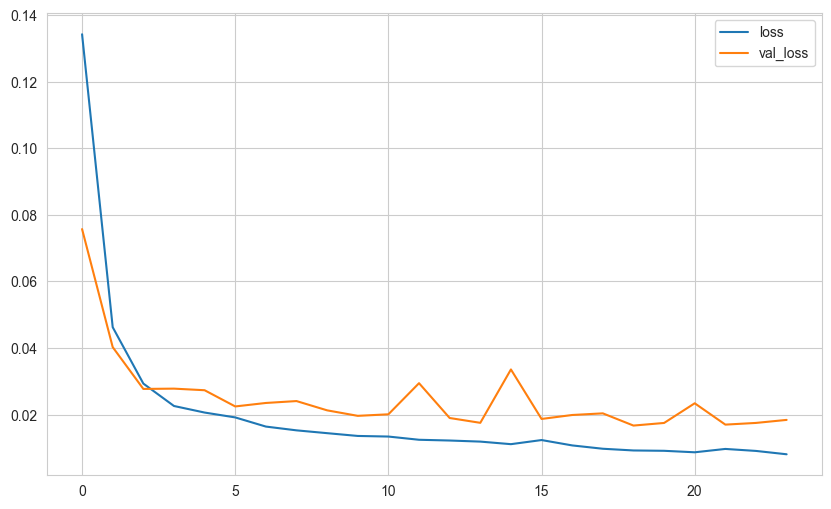

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

---
---

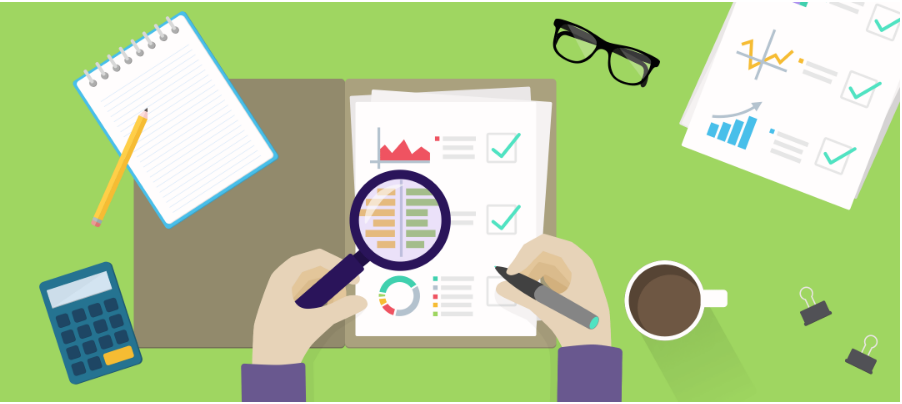

## 4. Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [65]:
y_pred = model.predict(X_test)

489/489 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step


In [66]:
eval_metrics(y_test, y_pred)

r2_score: 0.9808419722426931 
mae: 0.06539017 
mse: 0.01098395 
rmse: 0.104804344


### Inverse Transformation and Compare

In [67]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   # reshape ile tek satır haline getirmiş oluyoruz
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))     # kaç sütun ise o kadar sütun olacak
y_pred_inv = target_transformer.inverse_transform(y_pred)

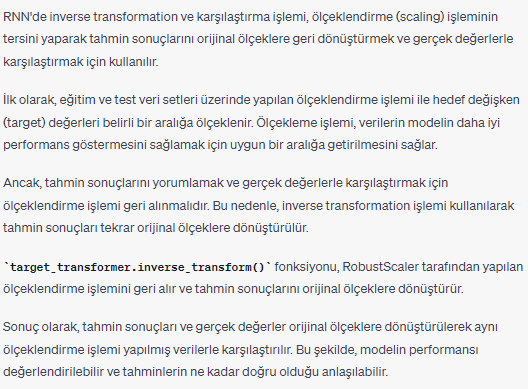

In [68]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
#pred_test.index = test_index

Bu kod, test verileri ile yapılan tahminlerin sonuçlarını düzenlemek için kullanılıyor. İşte bu kodun adım adım açıklaması:

İlk satırda, test veri çerçevesinin time_steps zaman adımı sonrasındaki indeksleri test_index adlı bir değişkene atanır. Bu, tahminlerin test verileri üzerinde yapılacağı zaman aralığını belirlemeye yardımcı olur.

İkinci satırda, tahmin sonuçlarını içeren y_test_inv ve y_pred_inv dizileri, bir veri çerçevesine dönüştürülür. y_test_inv, gerçek test verilerinin ters çevrilmiş (örneğin, ölçeklendirmenin ters çevrilmiş hali) halidir ve y_pred_inv, modelin yaptığı tahminlerin ters çevrilmiş hali olarak kabul edilir.

Üçüncü satırda, pd.concat fonksiyonu kullanılarak y_test_inv ve y_pred_inv veri çerçeveleri bir araya getirilir. Bu, tahminlerin gerçek test verileri ile birleştirilmesini sağlar.

Dördüncü satırda, sütun adları test ve prediction olarak ayarlanır. Bu adımlar sonucunda, pred_test adlı yeni bir veri çerçevesi oluşturulur.

Beşinci satırda, pred_test veri çerçevesinin indeksi test_index ile değiştirilir. Bu, verilerin uygun sırayla düzenlenmesini sağlar.

Sonuç olarak, pred_test veri çerçevesi, gerçek test verileri ve bu verileri kullanarak yapılan tahminlerin sonuçlarını içerir ve bu sonuçlar test_index ile düzenlenir. Bu şekilde, tahminlerin gerçek verilerle karşılaştırılması ve değerlendirilmesi için kullanılabilir.

In [69]:
pred_test

test  prediction
0      83.000     107.150
1      67.000       5.312
2      32.000      37.405
3      22.000     -17.332
4      38.000     -28.759
...       ...         ...
15643 217.000     252.989
15644 150.000     120.407
15645 107.000      65.057
15646 107.000     103.232
15647 173.000     166.406

[15648 rows x 2 columns]

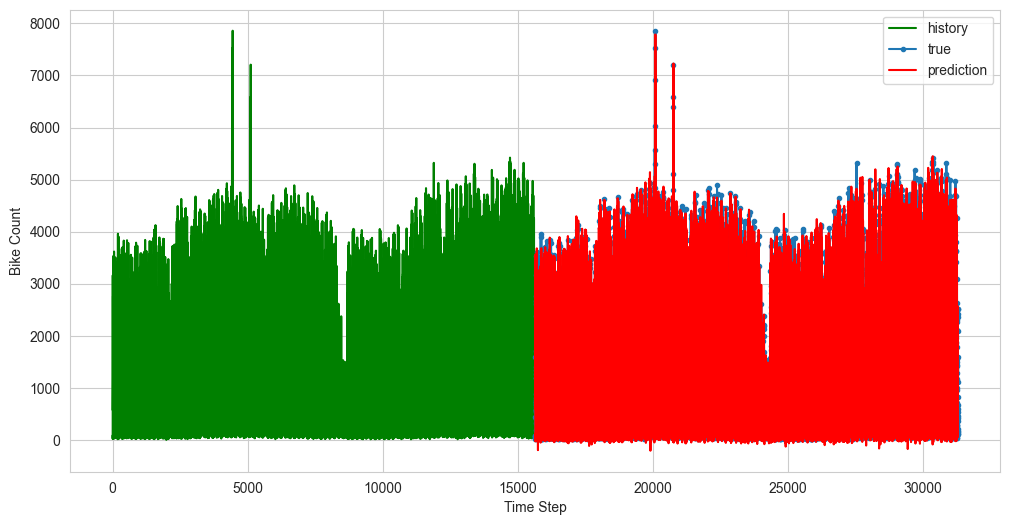

In [70]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

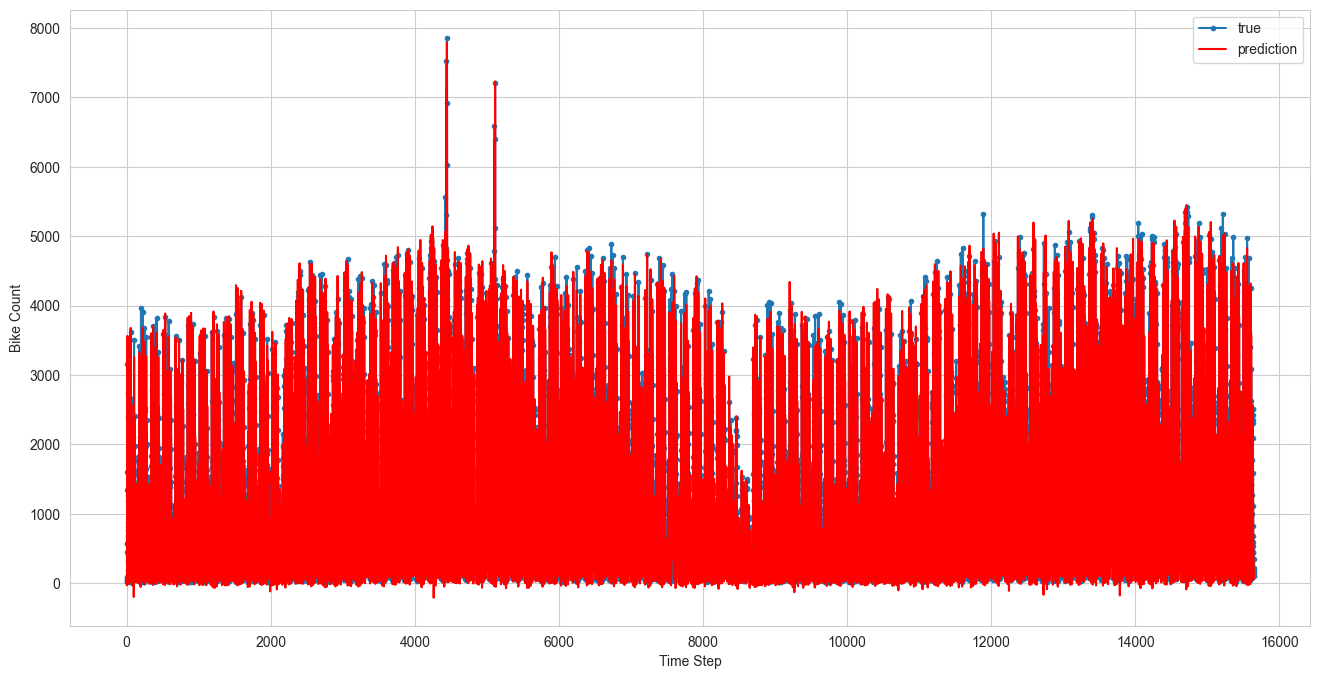

In [71]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

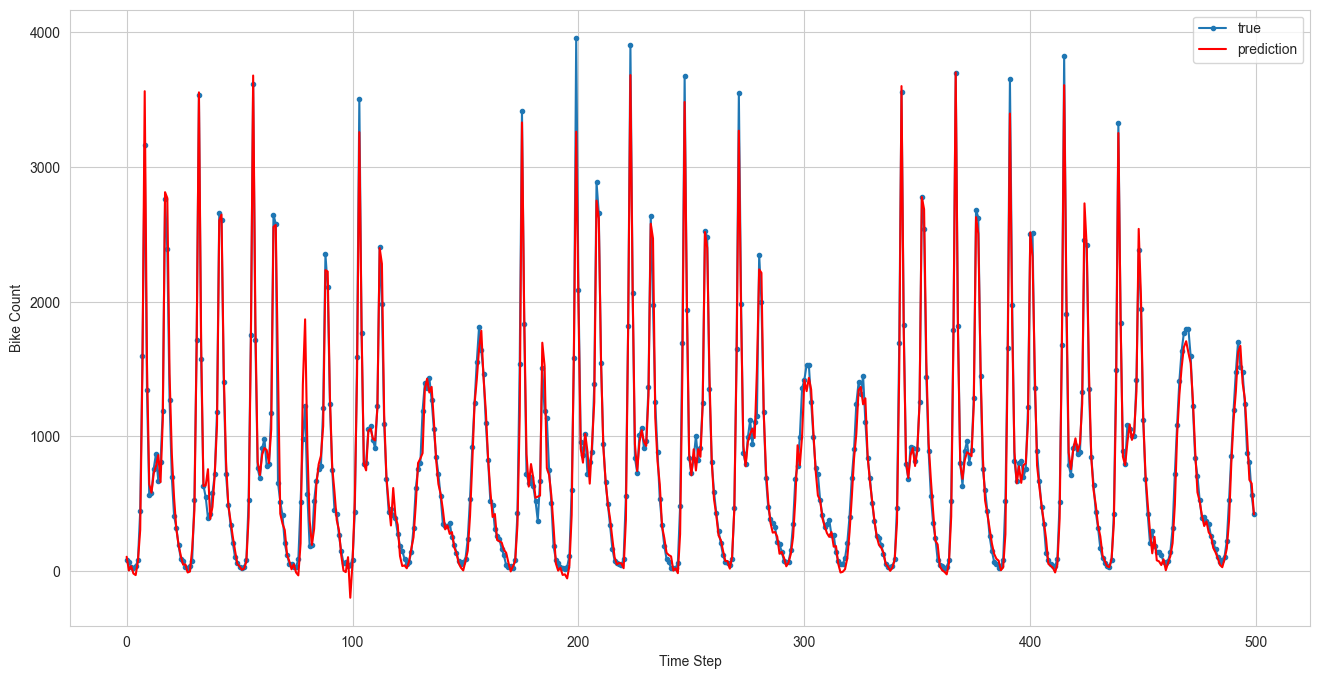

In [72]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten()[0:500], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[0:500], 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

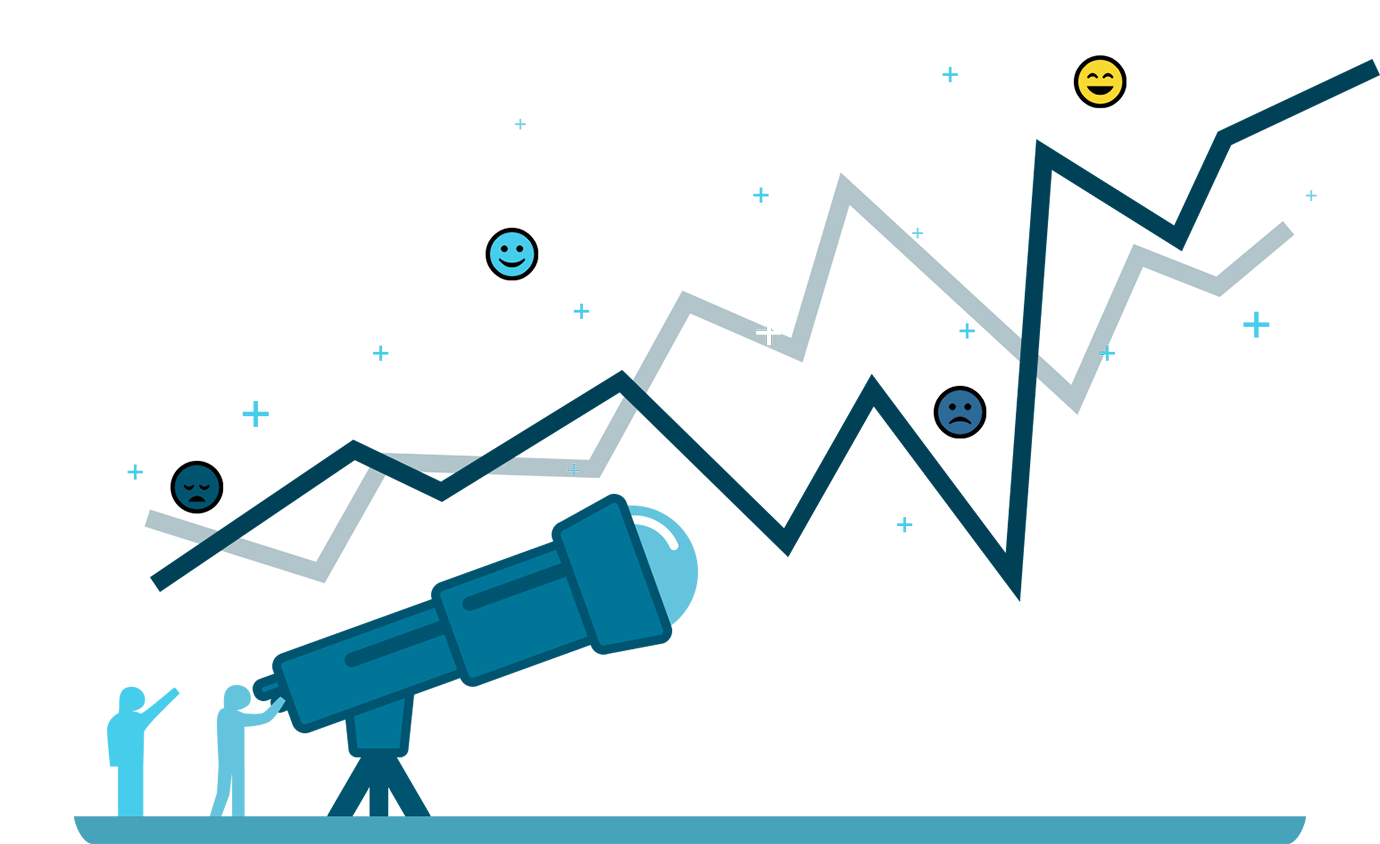

## 5. Retrain and Forecasting

### Scale full data

Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

In [73]:
val_size = 24
val = df_dum.iloc[-val_size:]
full = df_dum.iloc[:-val_size]
print(len(full), len(val))

17390 24


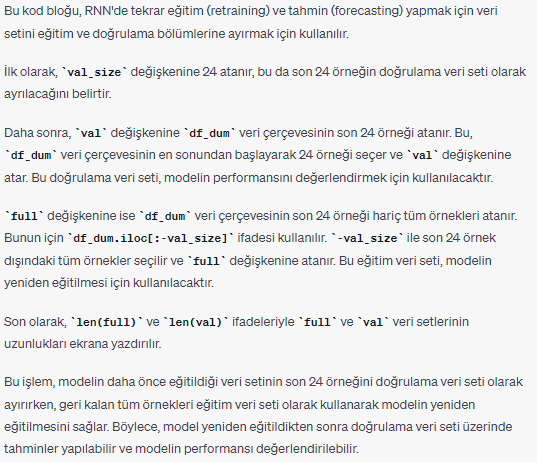

In [74]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()
target_transformer = RobustScaler()

full.loc[:, f_columns] = f_transformer.fit_transform(full[f_columns].to_numpy())
full['cnt'] = target_transformer.fit_transform(full[['cnt']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns])
val['cnt'] = target_transformer.transform(val[['cnt']])

In [75]:
full

cnt     t1   hum  wind_speed  is_holiday  is_weekend  \
timestamp                                                                     
2015-01-04 00:00:00 -0.468 -1.188 0.925      -0.857       0.000       1.000   
2015-01-04 01:00:00 -0.499 -1.188 0.925      -0.952       0.000       1.000   
2015-01-04 02:00:00 -0.501 -1.250 1.100      -1.429       0.000       1.000   
2015-01-04 03:00:00 -0.545 -1.312 1.275      -1.429       0.000       1.000   
2015-01-04 04:00:00 -0.563 -1.312 0.925      -0.810       0.000       1.000   
...                    ...    ...   ...         ...         ...         ...   
2017-01-02 19:00:00 -0.290 -1.188 0.325      -0.381       1.000       0.000   
2017-01-02 20:00:00 -0.360 -1.188 0.025      -0.190       1.000       0.000   
2017-01-02 21:00:00 -0.431 -1.250 0.175      -0.381       1.000       0.000   
2017-01-02 22:00:00 -0.454 -1.312 0.325      -0.476       1.000       0.000   
2017-01-02 23:00:00 -0.494 -1.438 0.925      -0.476       1.000       0.000   

                     w_code_10.0  w_code_2.0  w_code_26.0  w_code_3.0  \
timestamp                                                               
2015-01-04 00:00:00        False       False        False        True   
2015-01-04 01:00:00        False       False        False       False   
2015-01-04 02:00:00        False       False        False       False   
2015-01-04 03:00:00        False       False        False       False   
2015-01-04 04:00:00        False       False        False       False   
...                          ...         ...          ...         ...   
2017-01-02 19:00:00        False       False        False       False   
2017-01-02 20:00:00        False       False        False       False   
2017-01-02 21:00:00        False       False        False       False   
2017-01-02 22:00:00        False       False        False       False   
2017-01-02 23:00:00        False       False        False       False   

                     w_code_4.0  w_code_7.0  
timestamp                                    
2015-01-04 00:00:00       False       False  
2015-01-04 01:00:00       False       False  
2015-01-04 02:00:00       False       False  
2015-01-04 03:00:00       False       False  
2015-01-04 04:00:00       False       False  
...                         ...         ...  
2017-01-02 19:00:00       False       False  
2017-01-02 20:00:00       False       False  
2017-01-02 21:00:00       False       False  
2017-01-02 22:00:00       False       False  
2017-01-02 23:00:00       False       False  

[17390 rows x 12 columns]

### reshape to [samples, time_steps, n_features]

In [76]:
X, y = create_dataset(full, full.cnt, time_steps)

print(X.shape, y.shape)

(17366, 24, 12) (17366,)


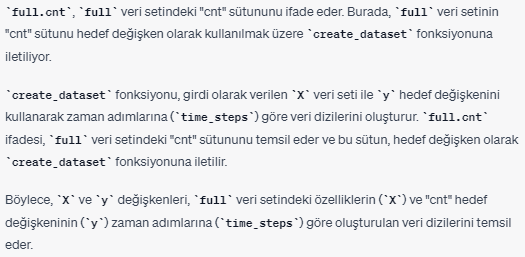

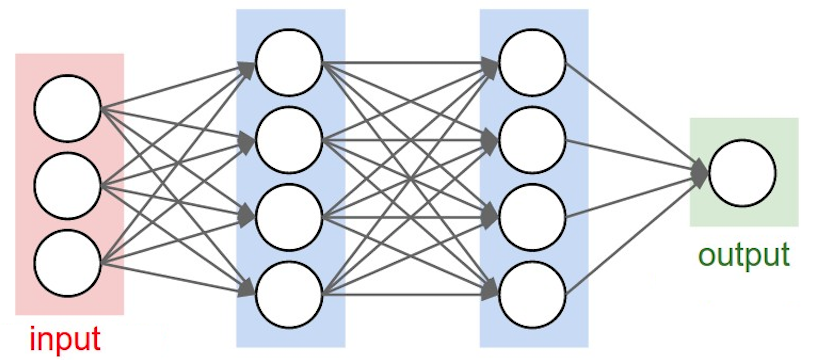

### Create Final model with full data 

In [77]:
X = X.astype('float32')
y = y.astype('float32')

In [78]:
model = Sequential()

model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [79]:
model.fit(X, y, 
          epochs=20, 
          batch_size=32        
         )

Epoch 1/20


543/543 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - loss: 0.1975
Epoch 2/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - loss: 0.0374
Epoch 3/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - loss: 0.0270
Epoch 4/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - loss: 0.0203
Epoch 5/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 44s 67ms/step - loss: 0.0173
Epoch 6/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 47s 78ms/step - loss: 0.0153
Epoch 7/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - loss: 0.0157
Epoch 8/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 39s 71ms/step - loss: 0.0158
Epoch 9/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 38s 69ms/step - loss: 0.0138
Epoch 10/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 36s 67ms/step - loss: 0.0152
Epoch 11/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 37s 69ms/step - loss: 0.0117
Epoch 12/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 38s 69ms/step - loss: 0.0128
Epoch 13/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - loss: 0.0127
Epoch 14/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - loss: 0.0106
Epoch 15/20
543/543 ━━━━━━━━━━━━━━━━━━━━

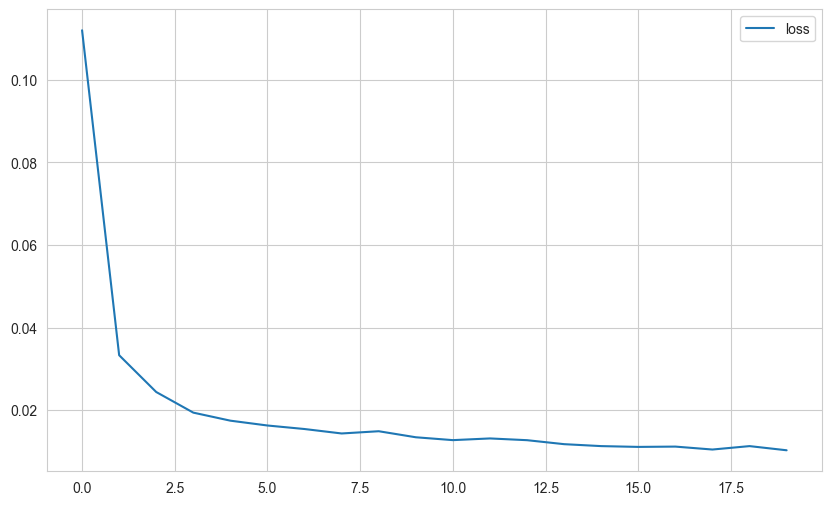

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### forecasting

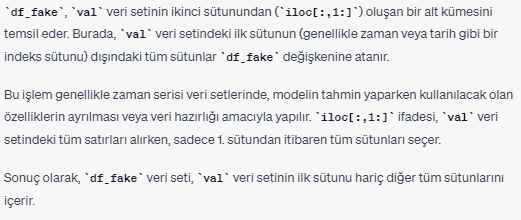

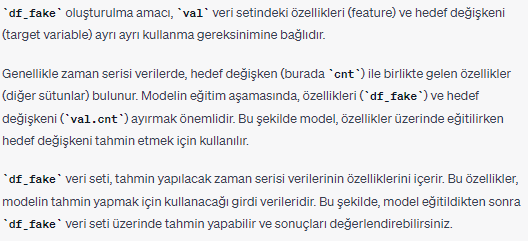

In [81]:
df_fake = val.iloc[:,1:]
df_fake

t1    hum  wind_speed  is_holiday  is_weekend  \
timestamp                                                               
2017-01-03 00:00:00 -1.438  0.775      -0.381       0.000       0.000   
2017-01-03 01:00:00 -1.438  0.625      -0.476       0.000       0.000   
2017-01-03 02:00:00 -1.500  0.775      -0.381       0.000       0.000   
2017-01-03 03:00:00 -1.562  0.925      -0.190       0.000       0.000   
2017-01-03 04:00:00 -1.562  0.925      -0.095       0.000       0.000   
2017-01-03 05:00:00 -1.500  0.775      -0.095       0.000       0.000   
2017-01-03 06:00:00 -1.438  0.625       0.286       0.000       0.000   
2017-01-03 07:00:00 -1.438  0.625       0.381       0.000       0.000   
2017-01-03 08:00:00 -1.438  0.625       0.333       0.000       0.000   
2017-01-03 09:00:00 -1.250  0.325      -0.095       0.000       0.000   
2017-01-03 10:00:00 -1.188  0.325       0.476       0.000       0.000   
2017-01-03 11:00:00 -1.062  0.175       0.571       0.000       0.000   
2017-01-03 12:00:00 -0.938  0.075       0.571       0.000       0.000   
2017-01-03 13:00:00 -0.812 -0.175       0.762       0.000       0.000   
2017-01-03 14:00:00 -0.812 -0.050       0.667       0.000       0.000   
2017-01-03 15:00:00 -0.812 -0.175       1.143       0.000       0.000   
2017-01-03 16:00:00 -0.812 -0.175       1.048       0.000       0.000   
2017-01-03 17:00:00 -0.812 -0.050       0.571       0.000       0.000   
2017-01-03 18:00:00 -0.938  0.325       0.667       0.000       0.000   
2017-01-03 19:00:00 -0.938  0.325       0.381       0.000       0.000   
2017-01-03 20:00:00 -0.938  0.325       0.571       0.000       0.000   
2017-01-03 21:00:00 -0.875  0.200       0.857       0.000       0.000   
2017-01-03 22:00:00 -0.875  0.075       0.762       0.000       0.000   
2017-01-03 23:00:00 -0.938  0.075       0.667       0.000       0.000   

                     w_code_10.0  w_code_2.0  w_code_26.0  w_code_3.0  \
timestamp                                                               
2017-01-03 00:00:00        False       False        False       False   
2017-01-03 01:00:00        False       False        False       False   
2017-01-03 02:00:00        False       False        False       False   
2017-01-03 03:00:00        False       False        False       False   
2017-01-03 04:00:00        False       False        False       False   
2017-01-03 05:00:00        False       False        False        True   
2017-01-03 06:00:00        False       False        False       False   
2017-01-03 07:00:00        False       False        False       False   
2017-01-03 08:00:00        False       False        False        True   
2017-01-03 09:00:00        False       False        False       False   
2017-01-03 10:00:00        False       False        False       False   
2017-01-03 11:00:00        False       False        False       False   
2017-01-03 12:00:00        False       False        False        True   
2017-01-03 13:00:00        False       False        False       False   
2017-01-03 14:00:00        False       False        False        True   
2017-01-03 15:00:00        False       False        False       False   
2017-01-03 16:00:00        False       False        False       False   
2017-01-03 17:00:00        False       False        False        True   
2017-01-03 18:00:00        False        True        False       False   
2017-01-03 19:00:00        False       False        False        True   
2017-01-03 20:00:00        False       False        False       False   
2017-01-03 21:00:00        False       False        False       False   
2017-01-03 22:00:00        False       False        False       False   
2017-01-03 23:00:00        False        True        False       False   

                     w_code_4.0  w_code_7.0  
timestamp                                    
2017-01-03 00:00:00       False       False  
2017-01-03 01:00:00       False       False  
2017-01-03 02:00:00       False       Fals

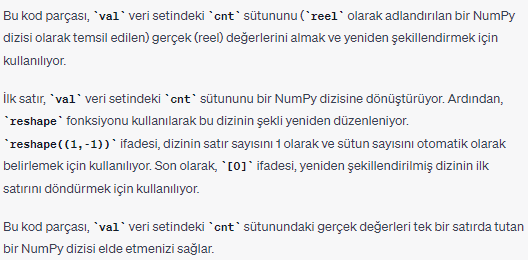

In [82]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([-5.51553672e-01, -5.61440678e-01, -5.65677966e-01, -5.88983051e-01,
       -5.74858757e-01, -5.37429379e-01, -2.89548023e-01,  3.97598870e-01,
        1.45480226e+00,  3.62288136e-01, -1.29237288e-01, -1.46892655e-01,
       -1.34180791e-02,  2.40112994e-02, -5.57909605e-02,  7.06214689e-04,
        2.52118644e-01,  1.34039548e+00,  9.71751412e-01,  1.39830508e-01,
       -2.13983051e-01, -3.58050847e-01, -4.37853107e-01, -4.97881356e-01])

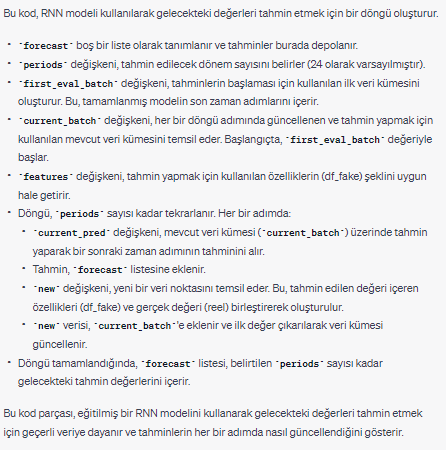

In [83]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
current_batch = current_batch.astype('float32')

features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [84]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.9728564378438367 
mae: 0.048437355437864975 
mse: 0.008890740160730848 
rmse: 0.0942907214986228


In [85]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[ 118.24878 ,   53.528625,   42.20172 ,   41.39508 ,   10.426941,
         104.602234,  323.693   , 1362.5432  , 3016.3098  , 1562.5775  ,
         658.7562  ,  632.48474 ,  861.4292  ,  883.39886 ,  886.5938  ,
         892.8325  , 1162.5261  , 2174.8604  , 2162.5552  , 1128.1055  ,
         551.1105  ,  349.54788 ,  202.35736 ,  109.1803  ]],
      dtype=float32)

In [86]:
forecast_index = pd.date_range(start = '2017-01-03 00:00:00', periods = periods, freq = 'H')

In [87]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

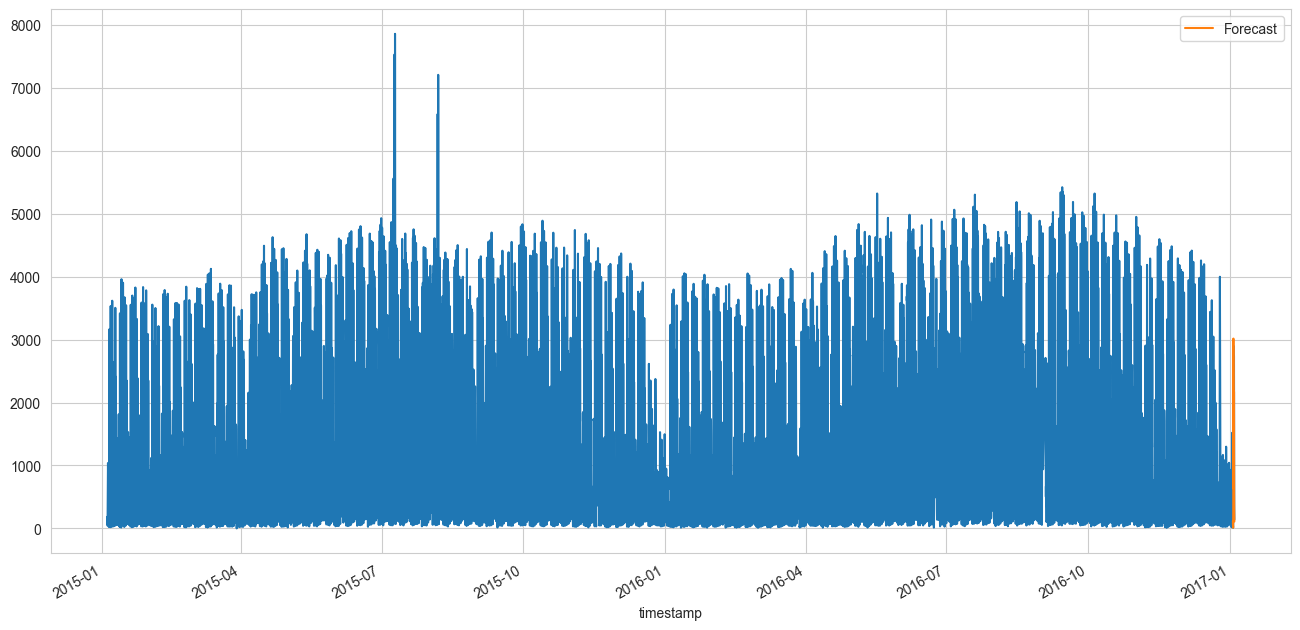

In [88]:
ax = df_raw["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(17167.0, 17169.958333333332)

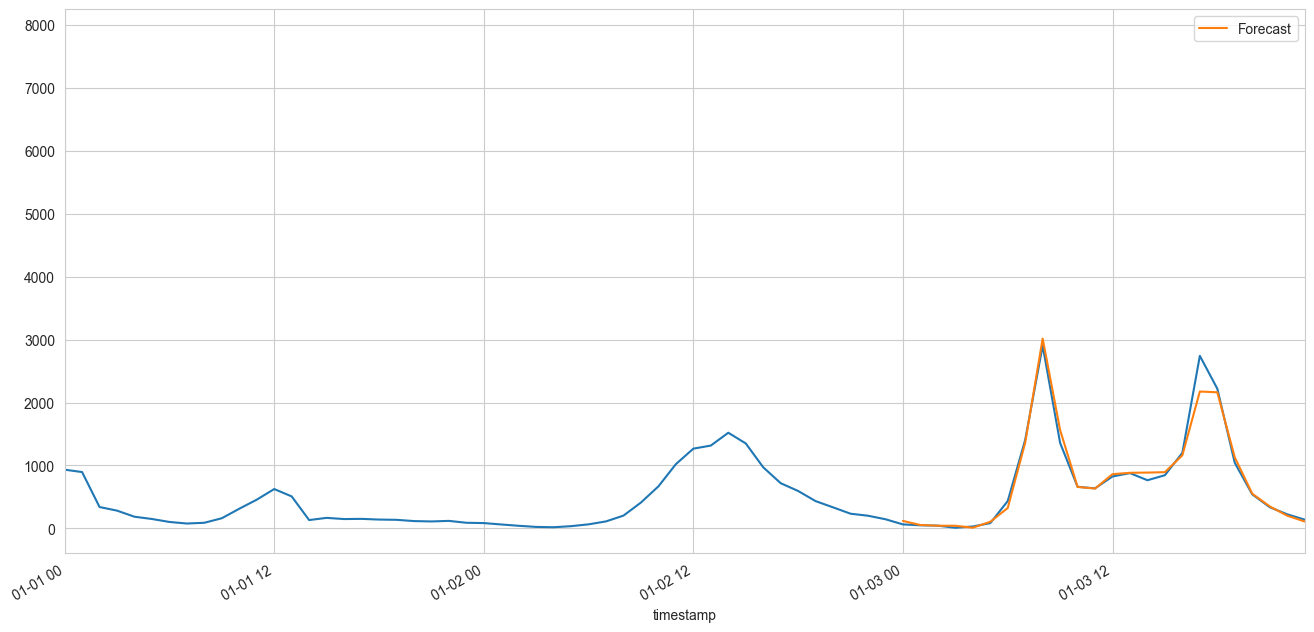

In [89]:
ax = df_raw["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-01 00:00:00', '2017-01-03 23:00:00')